## Surprise Housing Price Prediction using Linear, Ridge and Lasso Regressions

### The solution is divided into the following sections:

- Data understanding 
- Data cleaning and preparation
- Data exploration
- Model building and evaluation



### 1. Data Understanding

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

import calendar

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew 

In [2]:
#Load the Dataset
df = pd.read_csv("train.csv")

In [3]:
#Check Data
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
#checking the shape of the dataset 

df.shape

(1460, 81)

There are 81 fields and 1460 rows 

In [5]:
#checking the description of the dataset

df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [6]:
#checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2. Data Cleaning

Check for null values and treat fields with null values.

In [7]:
#checking for null values

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df_null=df[df.columns[df.isna().any()]]

In [9]:
df_null

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0            65.0   NaN    BrkFace       196.0       Gd       TA           No   
1            80.0   NaN        NaN         0.0       Gd       TA           Gd   
2            68.0   NaN    BrkFace       162.0       Gd       TA           Mn   
3            60.0   NaN        NaN         0.0       TA       Gd           No   
4            84.0   NaN    BrkFace       350.0       Gd       TA           Av   
...           ...   ...        ...         ...      ...      ...          ...   
1455         62.0   NaN        NaN         0.0       Gd       TA           No   
1456         85.0   NaN      Stone       119.0       Gd       TA           No   
1457         66.0   NaN        NaN         0.0       TA       Gd           No   
1458         68.0   NaN        NaN         0.0       TA       TA           Mn   
1459         75.0   NaN        NaN         0.0       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
0             GLQ          Unf      SBrkr         NaN     Attchd       2003.0   
1             ALQ          Unf      SBrkr          TA     Attchd       1976.0   
2             GLQ          Unf      SBrkr          TA     Attchd       2001.0   
3             ALQ          Unf      SBrkr          Gd     Detchd       1998.0   
4             GLQ          Unf      SBrkr          TA     Attchd       2000.0   
...           ...          ...        ...         ...        ...          ...   
1455          Unf          Unf      SBrkr          TA     Attchd       1999.0   
1456          ALQ          Rec      SBrkr          TA     Attchd       1978.0   
1457          GLQ          Unf      SBrkr          Gd     Attchd       1941.0   
1458          GLQ          Rec      FuseA         NaN     Attchd       1950.0   
1459          BLQ          LwQ      SBrkr         NaN     Attchd       1965.0   

     GarageFinish GarageQual GarageCond PoolQC  Fence MiscFeature  
0             RFn         TA         TA    NaN    NaN         NaN  
1             RFn         TA         TA    NaN    NaN         NaN  
2             RFn         TA         TA    NaN    NaN         NaN  
3             Unf         TA         TA    NaN    NaN         NaN  
4             RFn         TA         TA    NaN    NaN         NaN  
...           ...        ...        ...    ...    ...         ...  
1455          RFn         TA         TA    NaN    NaN         NaN  
1456          Unf         TA         TA    NaN  MnPrv         NaN  
1457          RFn         TA         TA    NaN  GdPrv        Shed  
1458          Unf         TA         TA    NaN    NaN         NaN  
1459          Fin         TA         TA    NaN    NaN         NaN  

[1460 rows x 19 columns]

In [10]:
#check the volume of null values

df_null.isnull().sum()/len(df_null)*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [11]:
# Drop fields with more than 30% null values

df.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns',inplace=True)

In [12]:
##Check missing values and printing total missing count as well as in percentage of total values 
df_null_data = df.isnull().sum()
null_val_percentage = 100*df_null_data/len(df)
null_data = pd.concat([df_null_data,null_val_percentage],axis =1)
null_data = null_data.rename(columns = {0:'Missing Values',1:'% of Total Values'})
null_data = null_data.sort_values('Missing Values',ascending = False)
null_data[(null_data['Missing Values'] > 0)]

Missing Values  % of Total Values
LotFrontage              259          17.739726
GarageYrBlt               81           5.547945
GarageCond                81           5.547945
GarageType                81           5.547945
GarageFinish              81           5.547945
GarageQual                81           5.547945
BsmtFinType2              38           2.602740
BsmtExposure              38           2.602740
BsmtFinType1              37           2.534247
BsmtCond                  37           2.534247
BsmtQual                  37           2.534247
MasVnrArea                 8           0.547945
Electrical                 1           0.068493

In [13]:
(df['Electrical'].mode())

0    SBrkr
Name: Electrical, dtype: object

In [14]:
## Imputing values in all categorical columns for NAN with respective information from data dictionary
df['LotFrontage']=df.LotFrontage.fillna(df.LotFrontage.mean())
df['BsmtQual'] = df['BsmtQual'].fillna('No_Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No_Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No_Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No_Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No_Basement')
df['GarageType'] = df['GarageType'].fillna('No_Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No_Garage')
df['GarageQual'] = df['GarageQual'].fillna('No_Garage')
df['GarageCond'] = df['GarageCond'].fillna('No_Garage')

## Imputing values in all numeric data type columns
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median()) 
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median()) 
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0]) 
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [15]:
df.isnull().sum().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
# Checking for duplicate data
dup_data = df.duplicated()
print('Number of duplicate rows = %d' % (dup_data.sum()))
df[dup_data]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 75 columns]

### Data Manipulation/Preparation:

#### Derived Metrics

In [18]:
## Deriving Age for House/garage built and remodel date  
df['HouseBuiltAge'] = df.YrSold - df.YearBuilt
df['HouseRemodelAge'] = df.YrSold - df.YearRemodAdd

In [19]:
#convert GarageYrBlt to integer
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'], downcast='integer', errors='coerce')

In [20]:
# Derive age of garage
df['GarageAge'] = df.YrSold - df.GarageYrBlt

In [21]:
## Creating temporary dataframe to prepare numeric data
numColumns = df.select_dtypes(include=np.number).columns.tolist()
numColumns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'HouseBuiltAge',
 'HouseRemodelAge',
 'GarageAge']

In [22]:
## Print all unique values counts for numeric columns
for i in range(len(numColumns)):
    print("The uniques Value Count for {0} : {1}".format(numColumns[i], df[numColumns[i]].nunique()))

The uniques Value Count for Id : 1460
The uniques Value Count for MSSubClass : 15
The uniques Value Count for LotFrontage : 111
The uniques Value Count for LotArea : 1073
The uniques Value Count for OverallQual : 10
The uniques Value Count for OverallCond : 9
The uniques Value Count for YearBuilt : 112
The uniques Value Count for YearRemodAdd : 61
The uniques Value Count for MasVnrArea : 327
The uniques Value Count for BsmtFinSF1 : 637
The uniques Value Count for BsmtFinSF2 : 144
The uniques Value Count for BsmtUnfSF : 780
The uniques Value Count for TotalBsmtSF : 721
The uniques Value Count for 1stFlrSF : 753
The uniques Value Count for 2ndFlrSF : 417
The uniques Value Count for LowQualFinSF : 24
The uniques Value Count for GrLivArea : 861
The uniques Value Count for BsmtFullBath : 4
The uniques Value Count for BsmtHalfBath : 3
The uniques Value Count for FullBath : 4
The uniques Value Count for HalfBath : 3
The uniques Value Count for BedroomAbvGr : 8
The uniques Value Count for Kitc

## Observation:
* Based on the unique values, it is evident that many variables are categorical in nature and all the categorical data needs to be removed from the numerical ones.

In [23]:
# Mapping respective values to the categorical variables

df.MSSubClass = df.MSSubClass.map({
20:'1-STORY 1946 & NEWER ALL STYLES', 
30:'1-STORY 1945 & OLDER', 
40:'1-STORY W/FINISHED ATTIC ALL AGES', 
45:'1-1/2 STORY - UNFINISHED ALL AGES', 
50:'1-1/2 STORY FINISHED ALL AGES', 
60:'2-STORY 1946 & NEWER', 
70:'2-STORY 1945 & OLDER', 
75:'2-1/2 STORY ALL AGES', 
80:'SPLIT OR MULTI-LEVEL', 
85:'SPLIT FOYER', 
90:'DUPLEX - ALL STYLES AND AGES', 
120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 
150:'1-1/2 STORY PUD - ALL AGES', 
160:'2-STORY PUD - 1946 & NEWER', 
180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 
190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

df.OverallQual = df.OverallQual.map({10:'Very Excellent', 9:'Excellent', 8:'Very Good', 
                                                       7:'Good', 6:'Above Average', 5:'Average', 4:'Below Average', 
                                                       3:'Fair', 2:'Poor', 1:'Very Poor'})

df.OverallCond = df.OverallCond.map({10:'Very Excellent', 9:'Excellent', 8:'Very Good', 
                                                       7:'Good', 6:'Above Average', 5:'Average', 4:'Below Average', 
                                                       3:'Fair', 2:'Poor', 1:'Very Poor'})

df.MoSold = df.MoSold.apply(lambda x: calendar.month_abbr[x])

In [24]:
## Creating temporary dataframe to prepare numeric data

#convert MasVnrArea to integer
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')


numColumns = ["LotFrontage", "LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
           "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
           "PoolArea","MiscVal", 'HouseBuiltAge','HouseRemodelAge','GarageAge',
           "EnclosedPorch","3SsnPorch","ScreenPorch","SalePrice"]


numData = df[numColumns]
numData.shape

(1460, 23)

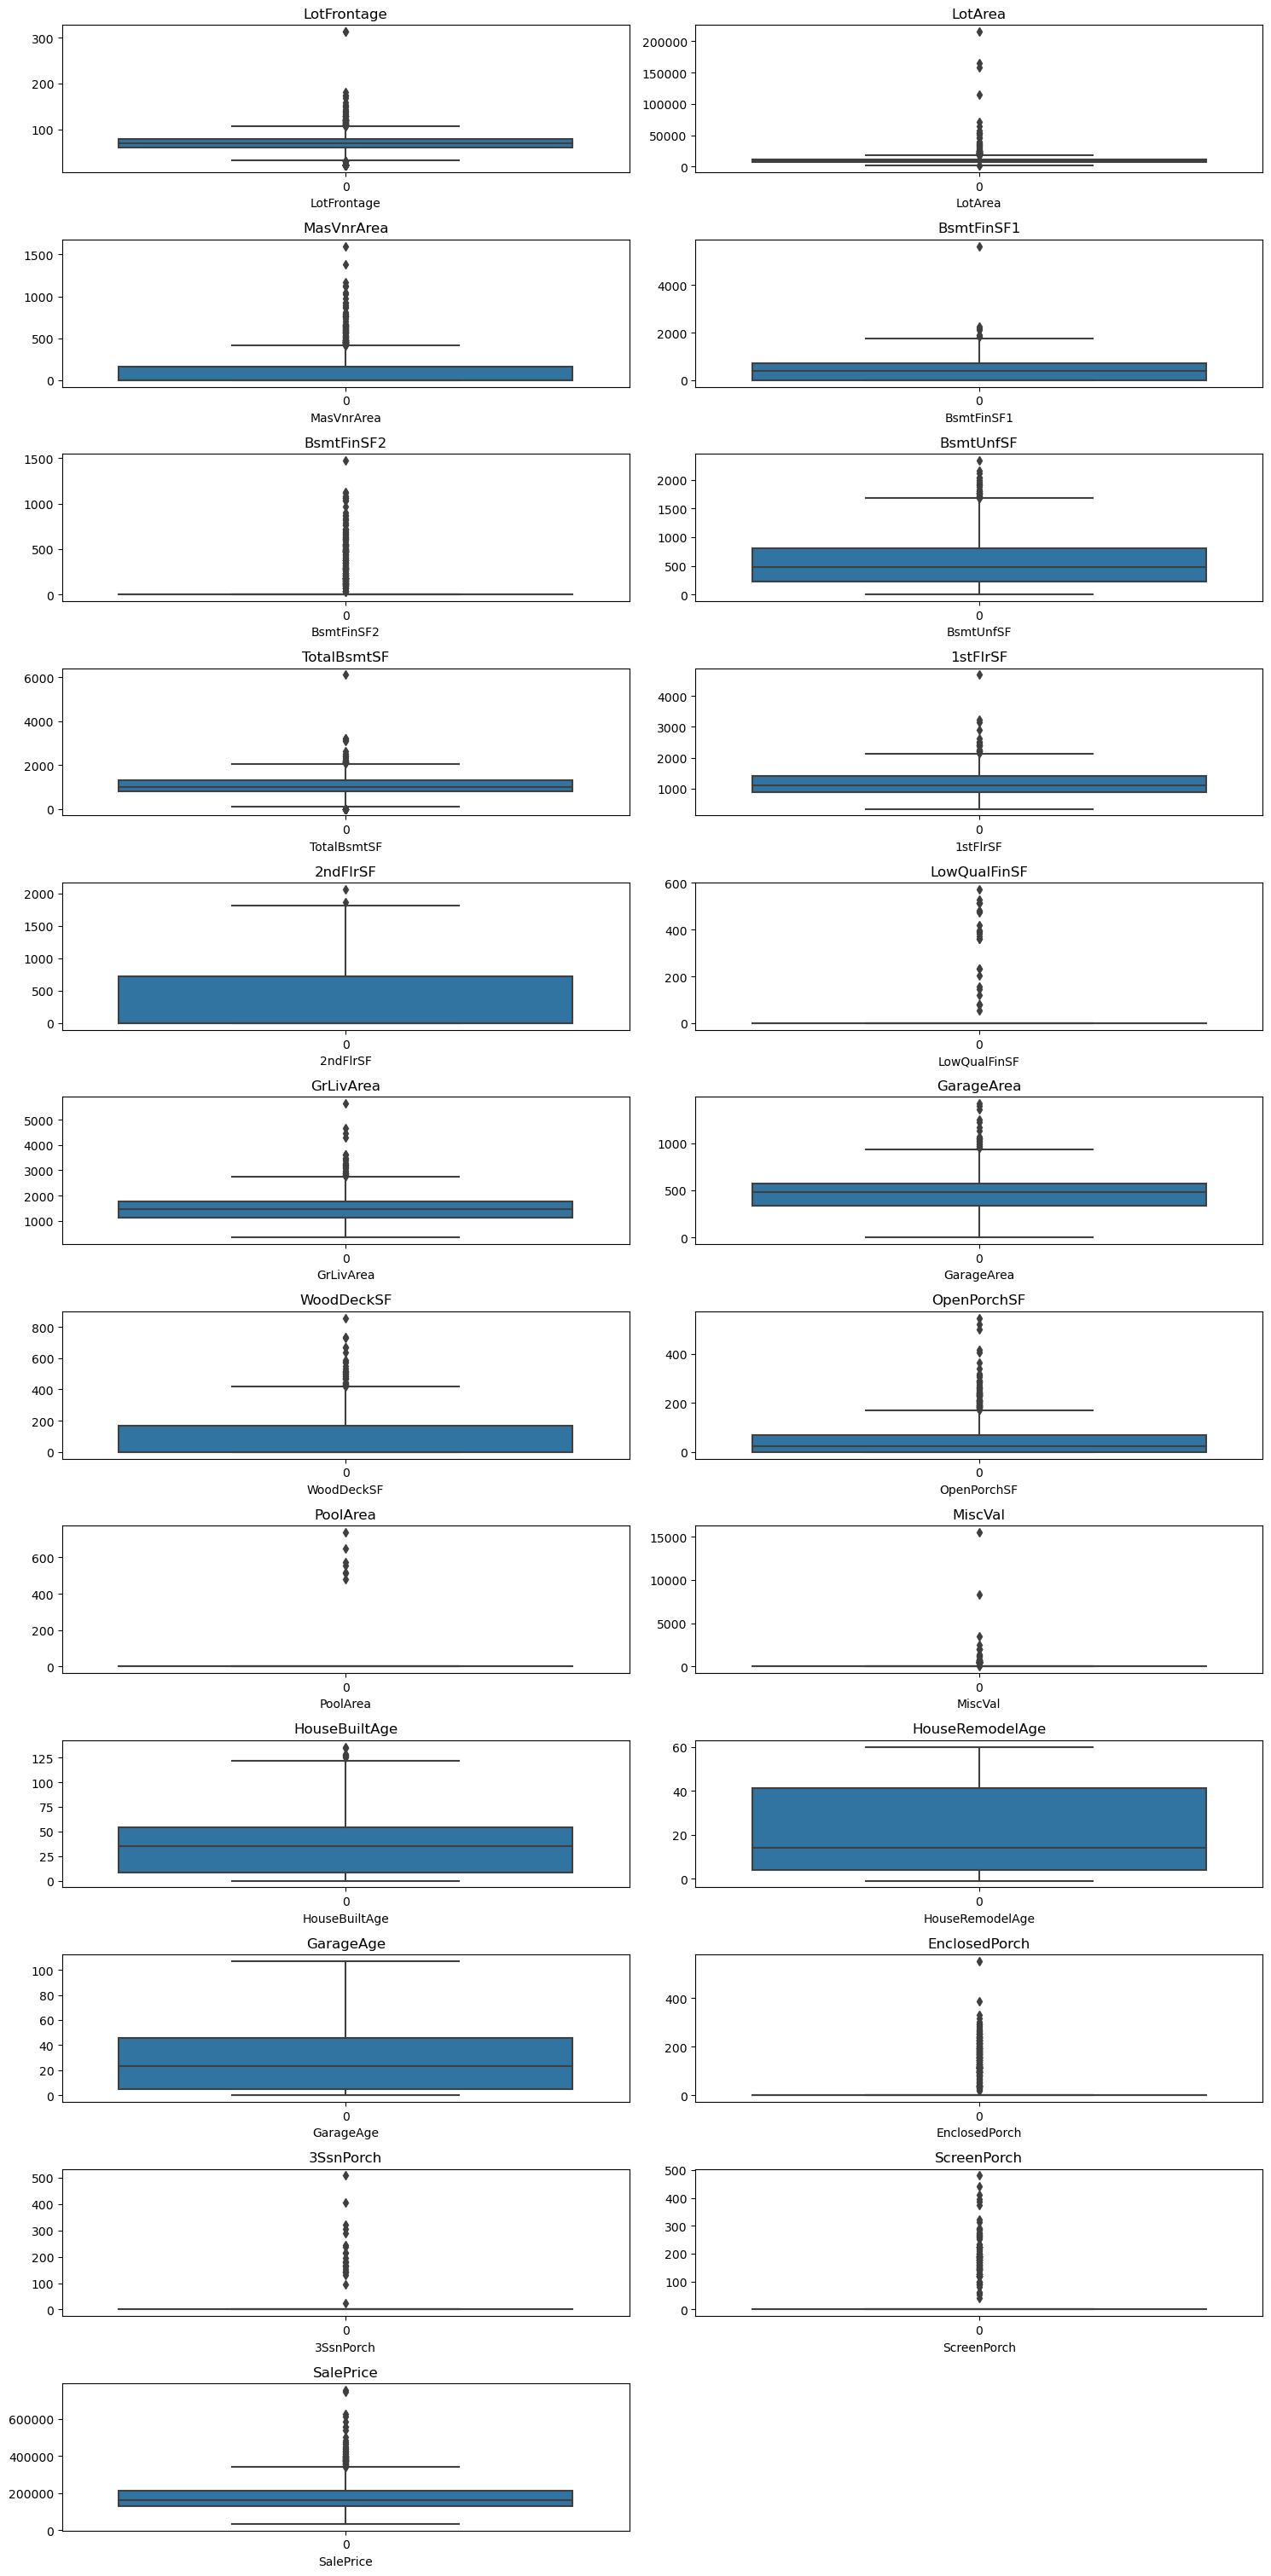

In [25]:
## Visualize all the numeric feature to check the spread in columns
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in numColumns:
    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.boxplot(numData[i])
    c = c + 1

plt.tight_layout()
plt.show();

### Data exploration

### Correlation Analysis

<Axes: >

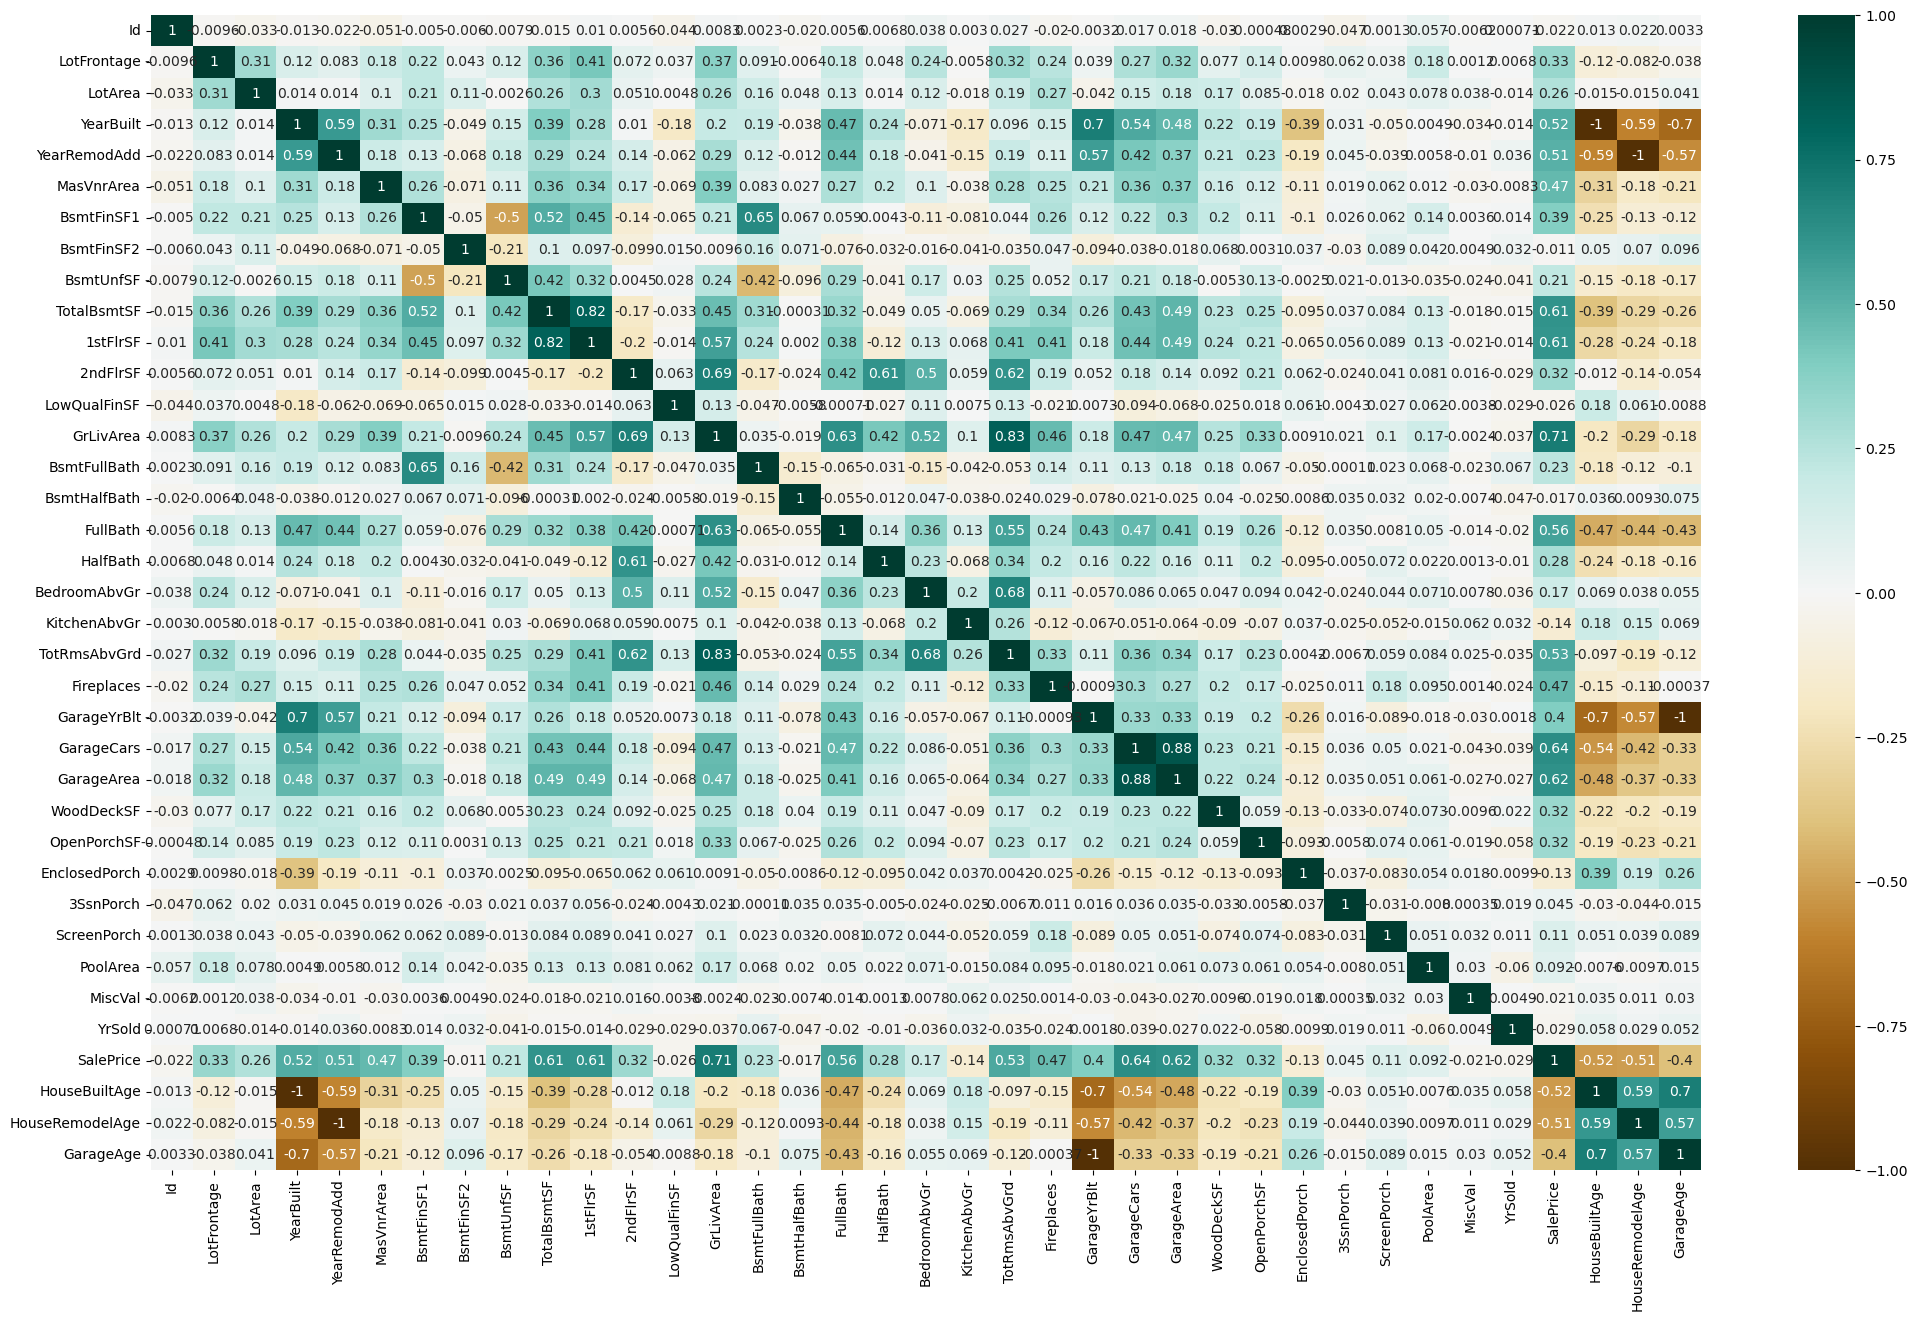

In [26]:
## Create heatmap to check correlation in numerical data 
plt.figure(figsize=(25, 15))

sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1, vmax=1, cmap='BrBG')

## Observations:
* Target Variable - SalePrice - is higly correlated with GrLivArea, GarageArea, GarageCars, TotalBsmtSF etc.
* HouseBuiltAge, HouseRemodelAge and GarageAge has negative correlation with SalePrice.
* GarageArea and GarageCars are highly correlated to each other. Similarly TotalBsmtSF and 1stFlrSF.

In [27]:
##Columns having categorical data in numerical format, so, changing to string for further operation
catCols1 = ["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr",
               "TotRmsAbvGrd","Fireplaces","GarageCars", "YrSold"]

for i in catCols1:
    df[i] = df[i].apply(lambda x: str(x))

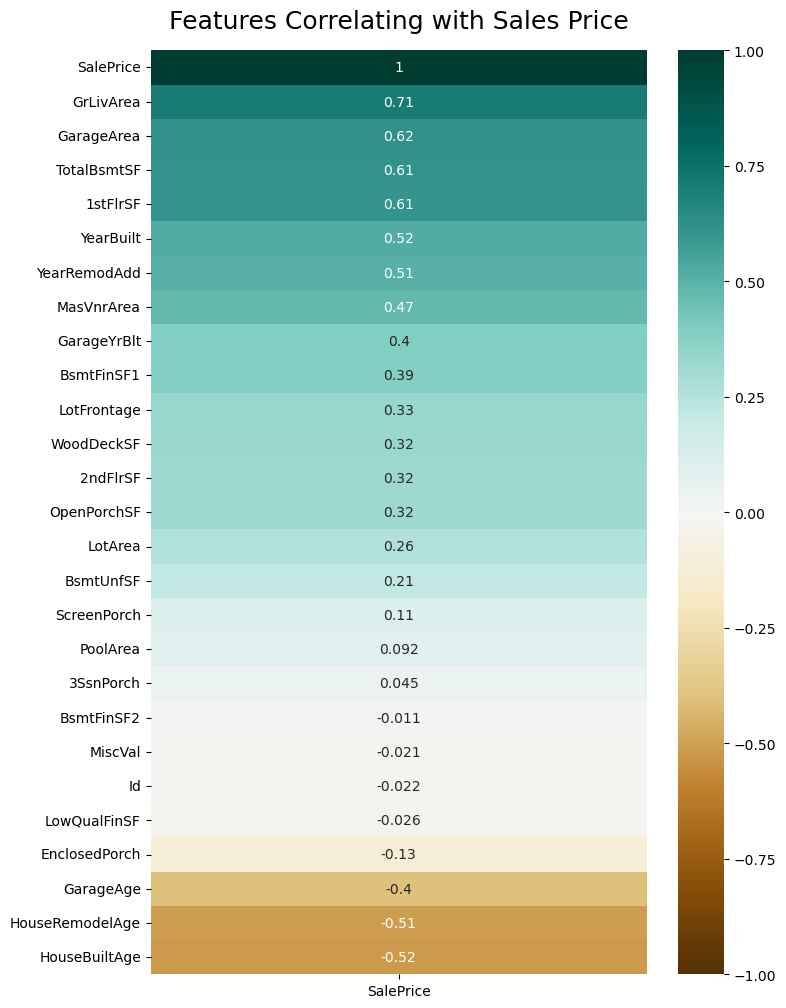

In [28]:
##Creating correlation matrix in single column to get more clear view
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(df.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

## Skewness in Features

In [29]:
## Apply log transformation on MasVnrArea and GarageAge before calculating their skewness as they contain zeroes.

numData['MasVnrArea'] = np.log(numData['MasVnrArea'] + 1)
numData['GarageAge'] = np.log(numData['GarageAge'] + 1)

## Check skewness in features
skew_in_vars = numData.apply(lambda x: round(x.skew(), 2))
skew_in_vars.sort_values(ascending=False)

MiscVal            24.48
PoolArea           14.83
LotArea            12.21
3SsnPorch          10.30
LowQualFinSF        9.01
BsmtFinSF2          4.26
ScreenPorch         4.12
EnclosedPorch       3.09
LotFrontage         2.38
OpenPorchSF         2.36
SalePrice           1.88
BsmtFinSF1          1.69
WoodDeckSF          1.54
TotalBsmtSF         1.52
1stFlrSF            1.38
GrLivArea           1.37
BsmtUnfSF           0.92
2ndFlrSF            0.81
HouseBuiltAge       0.61
HouseRemodelAge     0.50
MasVnrArea          0.50
GarageArea          0.18
GarageAge          -0.63
dtype: float64

### Visualizing Skewness in Features

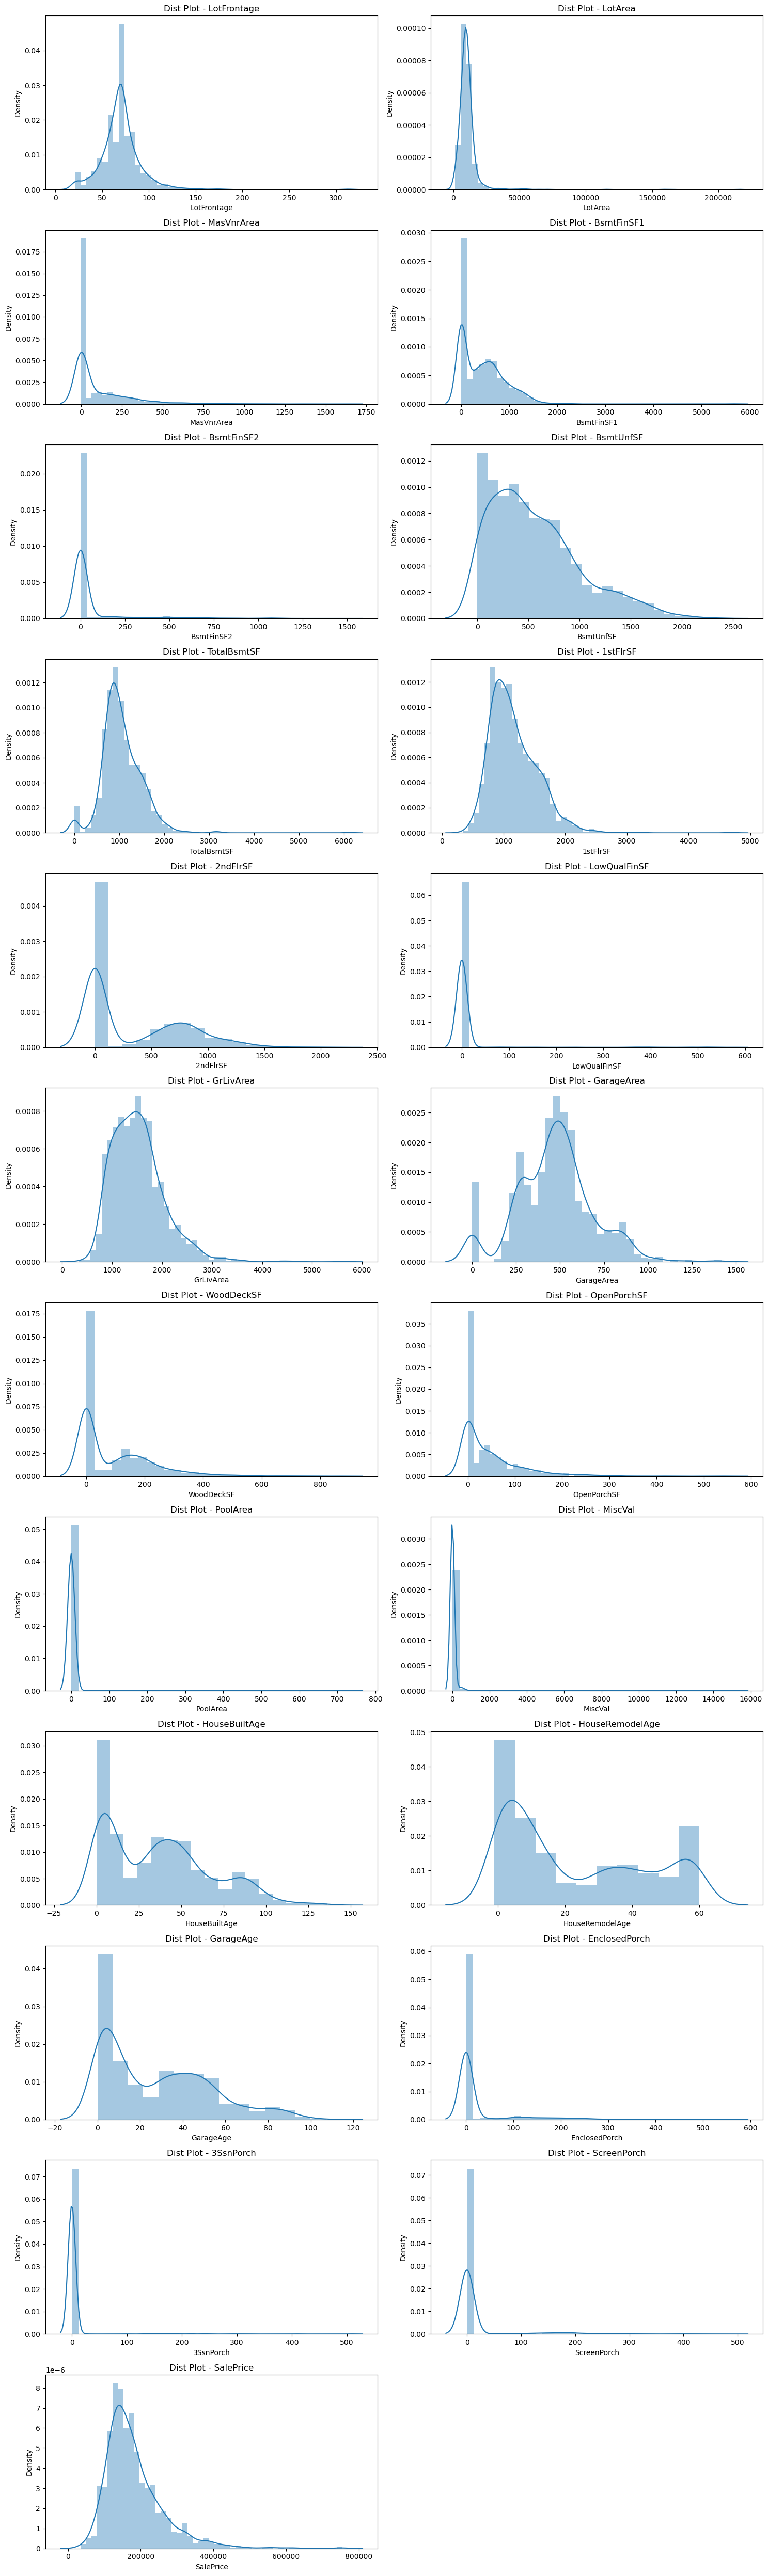

In [30]:
## Visualize skewness in numerical features
target_col = numColumns
a = (len(numColumns)//2) + 1
b = 2
c= 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)
for i in target_col:
    
    plt.subplot(a, b, c)
    plt.title('Dist Plot - {}'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i])
    c= c+1
    
plt.tight_layout()
plt.show();

In [31]:
numData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LotFrontage      1460 non-null   float64
 1   LotArea          1460 non-null   int64  
 2   MasVnrArea       1460 non-null   float64
 3   BsmtFinSF1       1460 non-null   int64  
 4   BsmtFinSF2       1460 non-null   int64  
 5   BsmtUnfSF        1460 non-null   int64  
 6   TotalBsmtSF      1460 non-null   int64  
 7   1stFlrSF         1460 non-null   int64  
 8   2ndFlrSF         1460 non-null   int64  
 9   LowQualFinSF     1460 non-null   int64  
 10  GrLivArea        1460 non-null   int64  
 11  GarageArea       1460 non-null   int64  
 12  WoodDeckSF       1460 non-null   int64  
 13  OpenPorchSF      1460 non-null   int64  
 14  PoolArea         1460 non-null   int64  
 15  MiscVal          1460 non-null   int64  
 16  HouseBuiltAge    1460 non-null   int64  
 17  HouseRemodelAg

### Observation:
Above metric shows the skewness in data and it needs to be handled.
Applying log transform to handle the skewness.
Performing log transforms for data which has skew more than 0.5. i.e. high skewed data We can ignore SalePrice for now, as it is Target variable. This will be handled separately.

In [32]:
# Dropping SalePrice - Target Variable from skew Series
skew_in_vars = skew_in_vars.drop('SalePrice')

### Transforming the X- Feature (Log tranformation)

In [33]:
##Print columns which skew more than 0.5
high_skew = skew_in_vars[skew_in_vars > 0.5]
skew_index = high_skew.index
skew_index

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MiscVal', 'HouseBuiltAge',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch'],
      dtype='object')

In [34]:
##Applying log transformation where columns skew more than 0.5
for i in skew_index:
    numData[i] = np.log1p(numData[i])
    
numData.apply(lambda x: x.skew()).sort_values(ascending=False)

PoolArea           14.363102
3SsnPorch           7.734975
LowQualFinSF        7.460317
MiscVal             5.170704
ScreenPorch         3.150409
BsmtFinSF2          2.523694
EnclosedPorch       2.112275
SalePrice           1.882876
MasVnrArea          0.503532
HouseRemodelAge     0.502489
2ndFlrSF            0.289643
GarageArea          0.179981
WoodDeckSF          0.153537
1stFlrSF            0.080114
GrLivArea          -0.006140
OpenPorchSF        -0.023397
LotArea            -0.137404
BsmtFinSF1         -0.618410
GarageAge          -0.630045
HouseBuiltAge      -0.843471
LotFrontage        -0.891977
BsmtUnfSF          -2.186504
TotalBsmtSF        -5.154670
dtype: float64

In [35]:
# Log Transformation of SalePrice

df['SalePrice_log'] = np.log(df['SalePrice'])

salePrice = df[['SalePrice']].copy()
df = df.drop('SalePrice',axis=1) # removing the Target variable

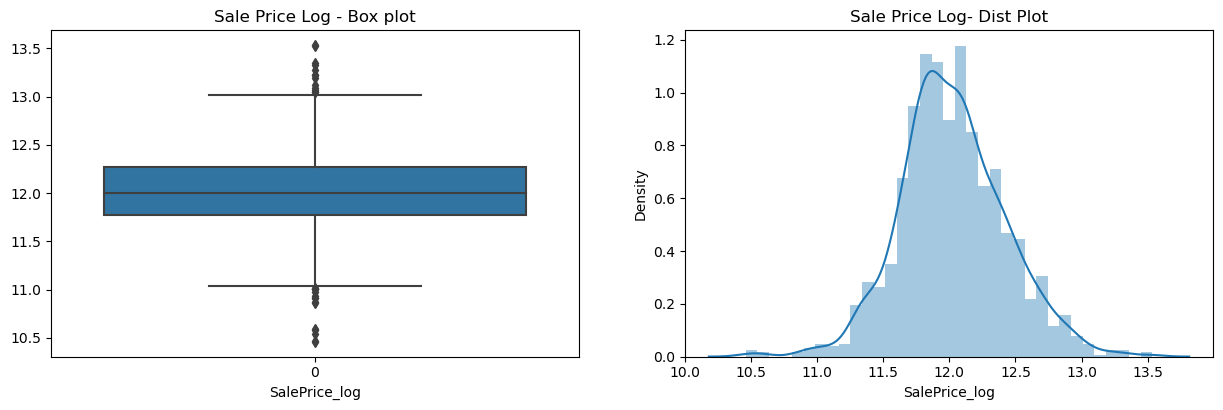

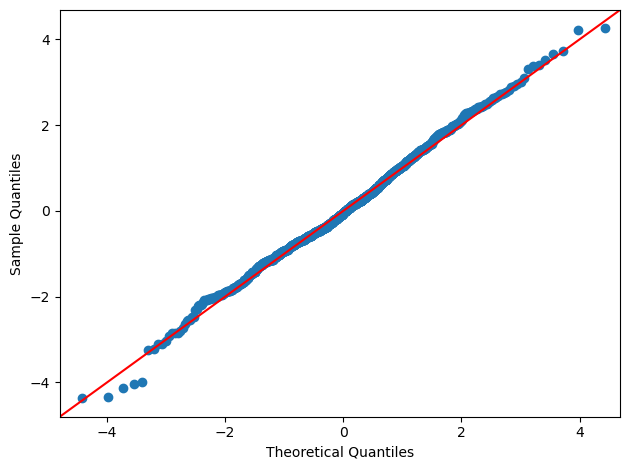

In [36]:
## Visualize the 'SalePrice' column after log transform
target_col = ['SalePrice_log']

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(10, 2, 1)
    plt.title('Sale Price Log - Box plot')
    plt.xlabel(i)
    sns.boxplot(df[i])
    
    plt.subplot(10, 2, 2)
    plt.title('Sale Price Log- Dist Plot')
    plt.xlabel(i)
    sns.distplot(df[i])
    
    sm.qqplot(df[i], stats.t, distargs=(4,),fit=True, line="45")
    
plt.tight_layout()
plt.show();

### SalePrice skewness is handled now and all the plot shows the same.
- Box plot: Its symmetrical along median.
- Dist plot: Data shows normally distributed.
- QQ plot: Spread shows linear in nature.

In [37]:
# Adding Target variable (LOG) to numerical DataFrame
numData = pd.concat([numData, df[['SalePrice_log']]],axis=1)
numData.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     4.189655  9.042040    5.283204    6.561031         0.0   5.017280   
1     4.394449  9.169623    0.000000    6.886532         0.0   5.652489   
2     4.234107  9.328212    5.093750    6.188264         0.0   6.075346   
3     4.110874  9.164401    0.000000    5.379897         0.0   6.293419   
4     4.442651  9.565284    5.860786    6.486161         0.0   6.196444   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  PoolArea  MiscVal  \
0     6.753438  6.753438  6.751101           0.0  ...       0.0      0.0   
1     7.141245  7.141245  0.000000           0.0  ...       0.0      0.0   
2     6.825460  6.825460  6.765039           0.0  ...       0.0      0.0   
3     6.629363  6.869014  6.629363           0.0  ...       0.0      0.0   
4     7.044033  7.044033  6.960348           0.0  ...       0.0      0.0   

   HouseBuiltAge  HouseRemodelAge  GarageAge  EnclosedPorch  3SsnPorch  \
0       1.791759                5   1.791759       0.000000        0.0   
1       3.465736               31   3.465736       0.000000        0.0   
2       2.079442                6   2.079442       0.000000        0.0   
3       4.521789               36   2.197225       5.609472        0.0   
4       2.197225                8   2.197225       0.000000        0.0   

   ScreenPorch  SalePrice  SalePrice_log  
0          0.0     208500      12.247694  
1          0.0     181500      12.109011  
2          0.0     223500      12.317167  
3          0.0     140000      11.849398  
4          0.0     250000      12.429216  

[5 rows x 24 columns]

In [38]:
# Dropping 'SalePrice' variable from numerical DataFrame and numerical Columns List as we have new column with transformed value
numData = numData.drop('SalePrice', axis = 1)
numColumns.remove('SalePrice')

numData.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     4.189655  9.042040    5.283204    6.561031         0.0   5.017280   
1     4.394449  9.169623    0.000000    6.886532         0.0   5.652489   
2     4.234107  9.328212    5.093750    6.188264         0.0   6.075346   
3     4.110874  9.164401    0.000000    5.379897         0.0   6.293419   
4     4.442651  9.565284    5.860786    6.486161         0.0   6.196444   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  OpenPorchSF  PoolArea  \
0     6.753438  6.753438  6.751101           0.0  ...     4.127134       0.0   
1     7.141245  7.141245  0.000000           0.0  ...     0.000000       0.0   
2     6.825460  6.825460  6.765039           0.0  ...     3.761200       0.0   
3     6.629363  6.869014  6.629363           0.0  ...     3.583519       0.0   
4     7.044033  7.044033  6.960348           0.0  ...     4.442651       0.0   

   MiscVal  HouseBuiltAge  HouseRemodelAge  GarageAge  EnclosedPorch  \
0      0.0       1.791759                5   1.791759       0.000000   
1      0.0       3.465736               31   3.465736       0.000000   
2      0.0       2.079442                6   2.079442       0.000000   
3      0.0       4.521789               36   2.197225       5.609472   
4      0.0       2.197225                8   2.197225       0.000000   

   3SsnPorch  ScreenPorch  SalePrice_log  
0        0.0          0.0      12.247694  
1        0.0          0.0      12.109011  
2        0.0          0.0      12.317167  
3        0.0          0.0      11.849398  
4        0.0          0.0      12.429216  

[5 rows x 23 columns]

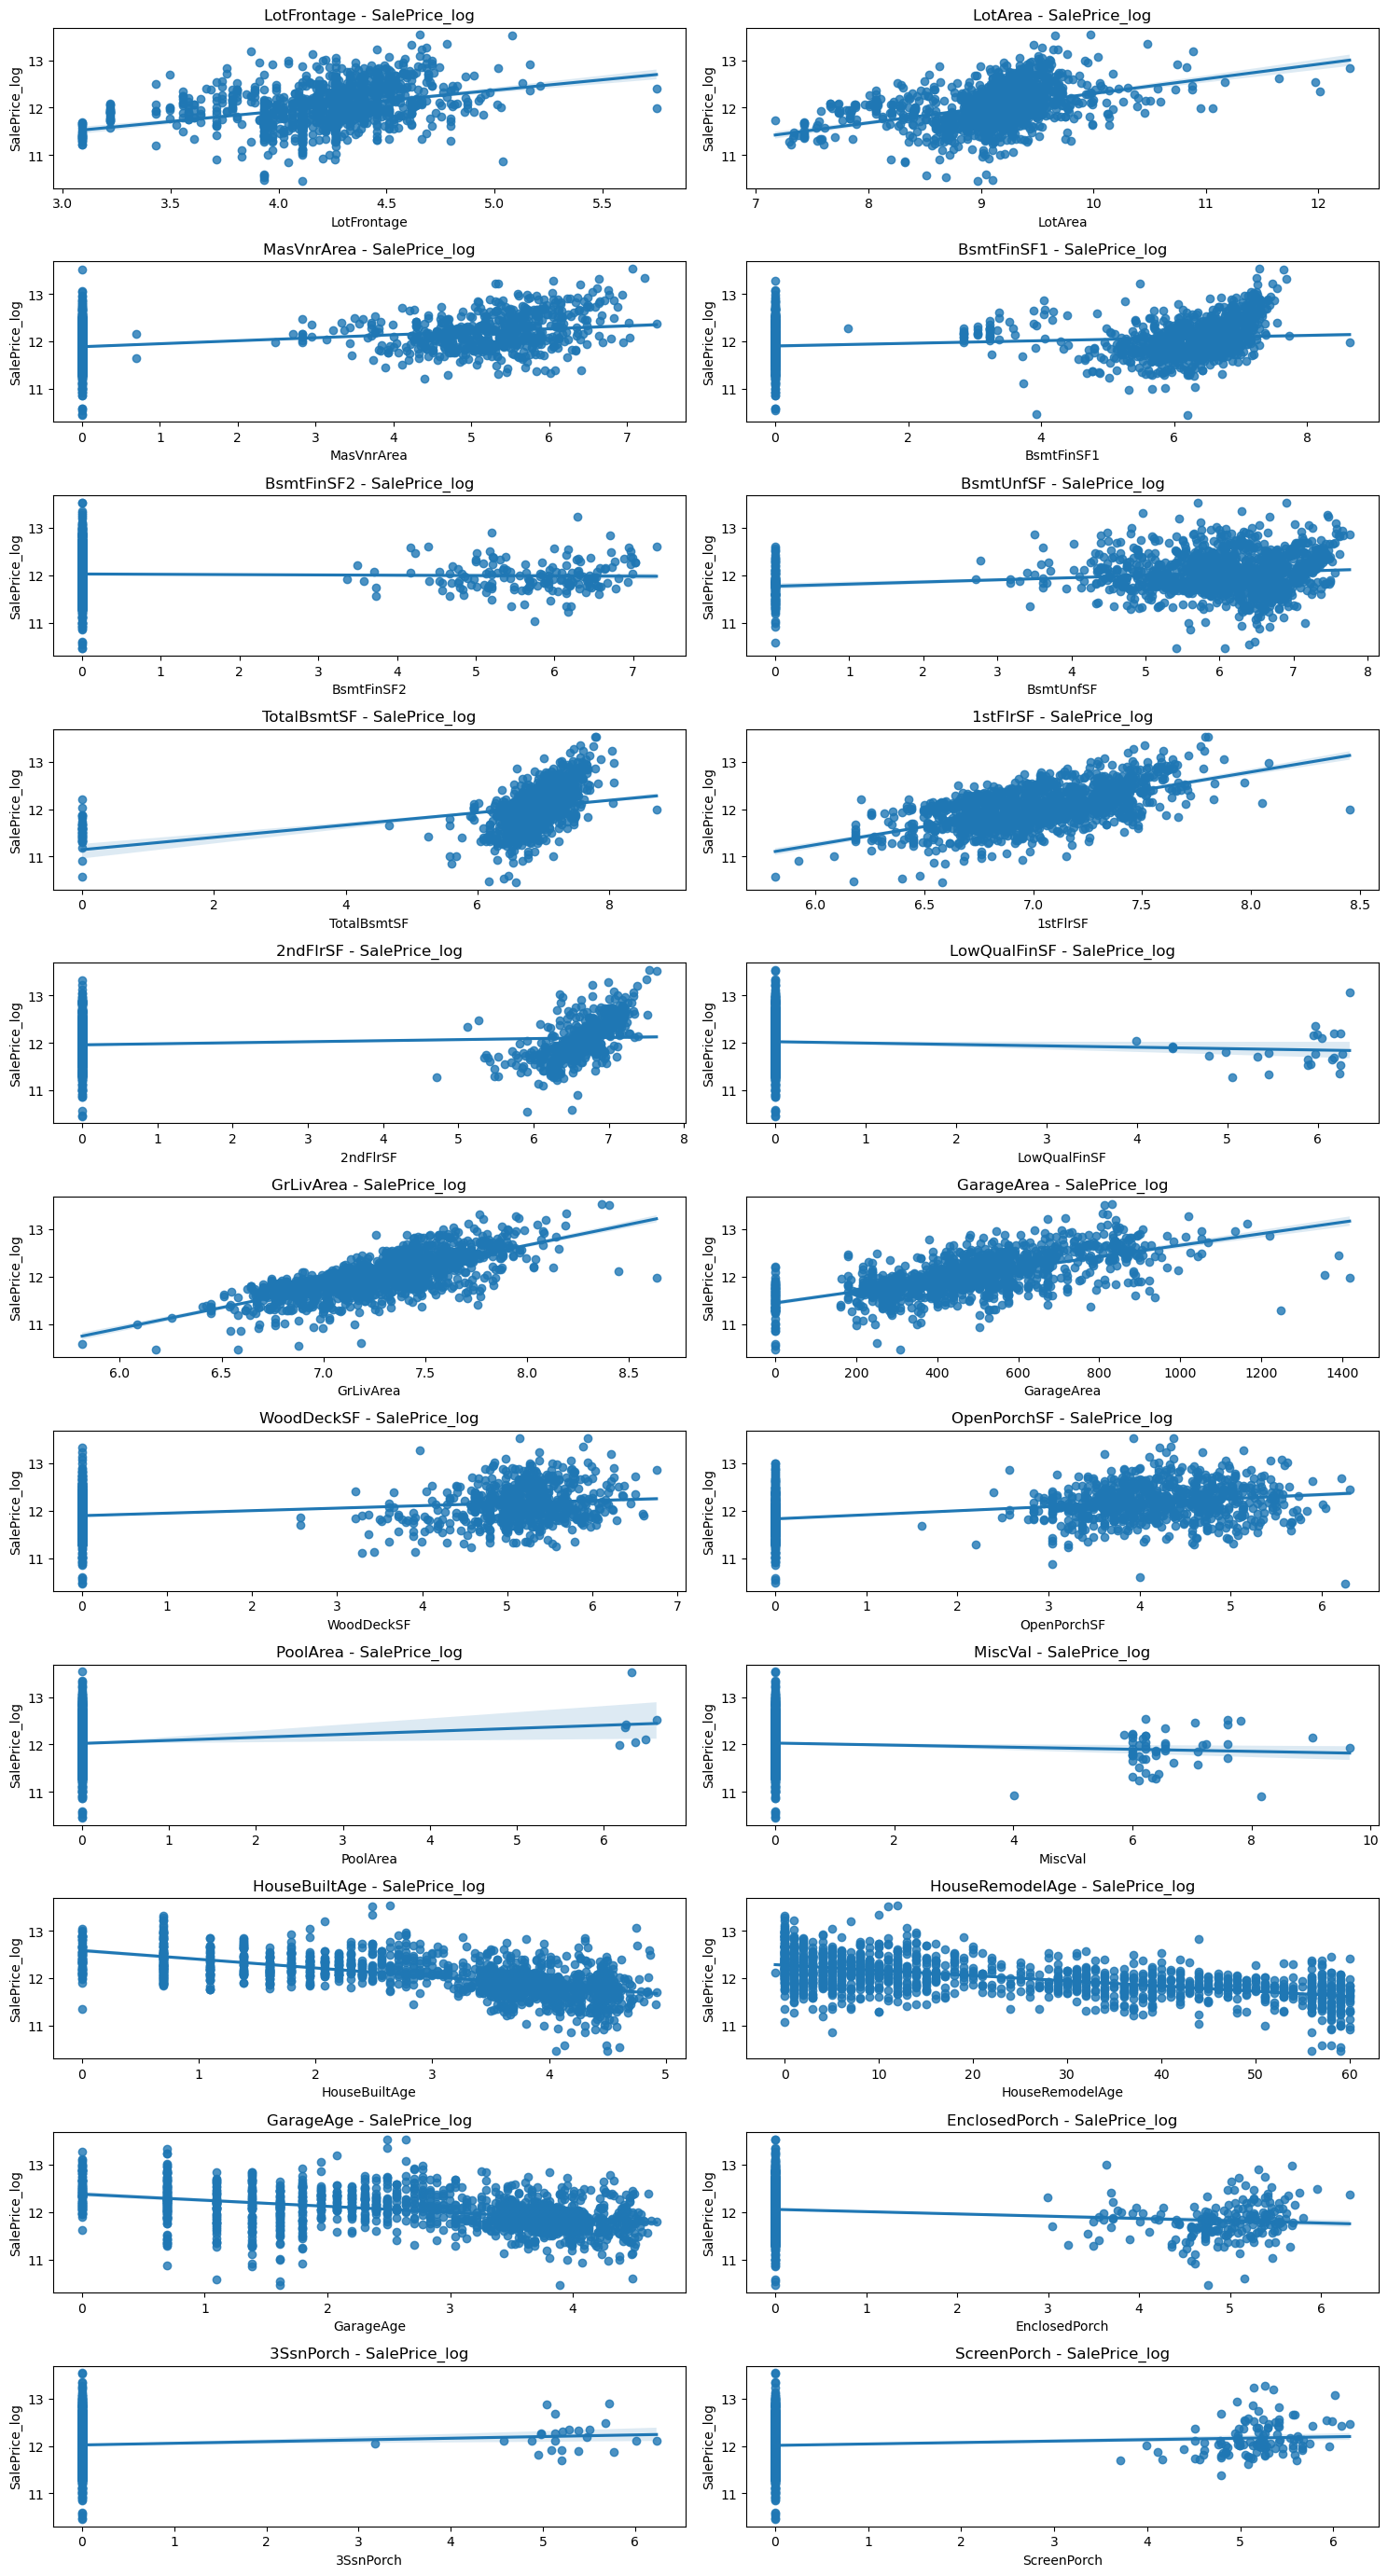

In [39]:
## Creating scatter plot to check column relation with target variable
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in numColumns:
    plt.subplot(a, b, c)
    plt.title('{} - SalePrice_log'.format(i))
    plt.xlabel(i)
    sns.regplot(x=numData[i], y=numData['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### Correlation - Heatmap (Post Log transformation on Numerical Data)

<Axes: >

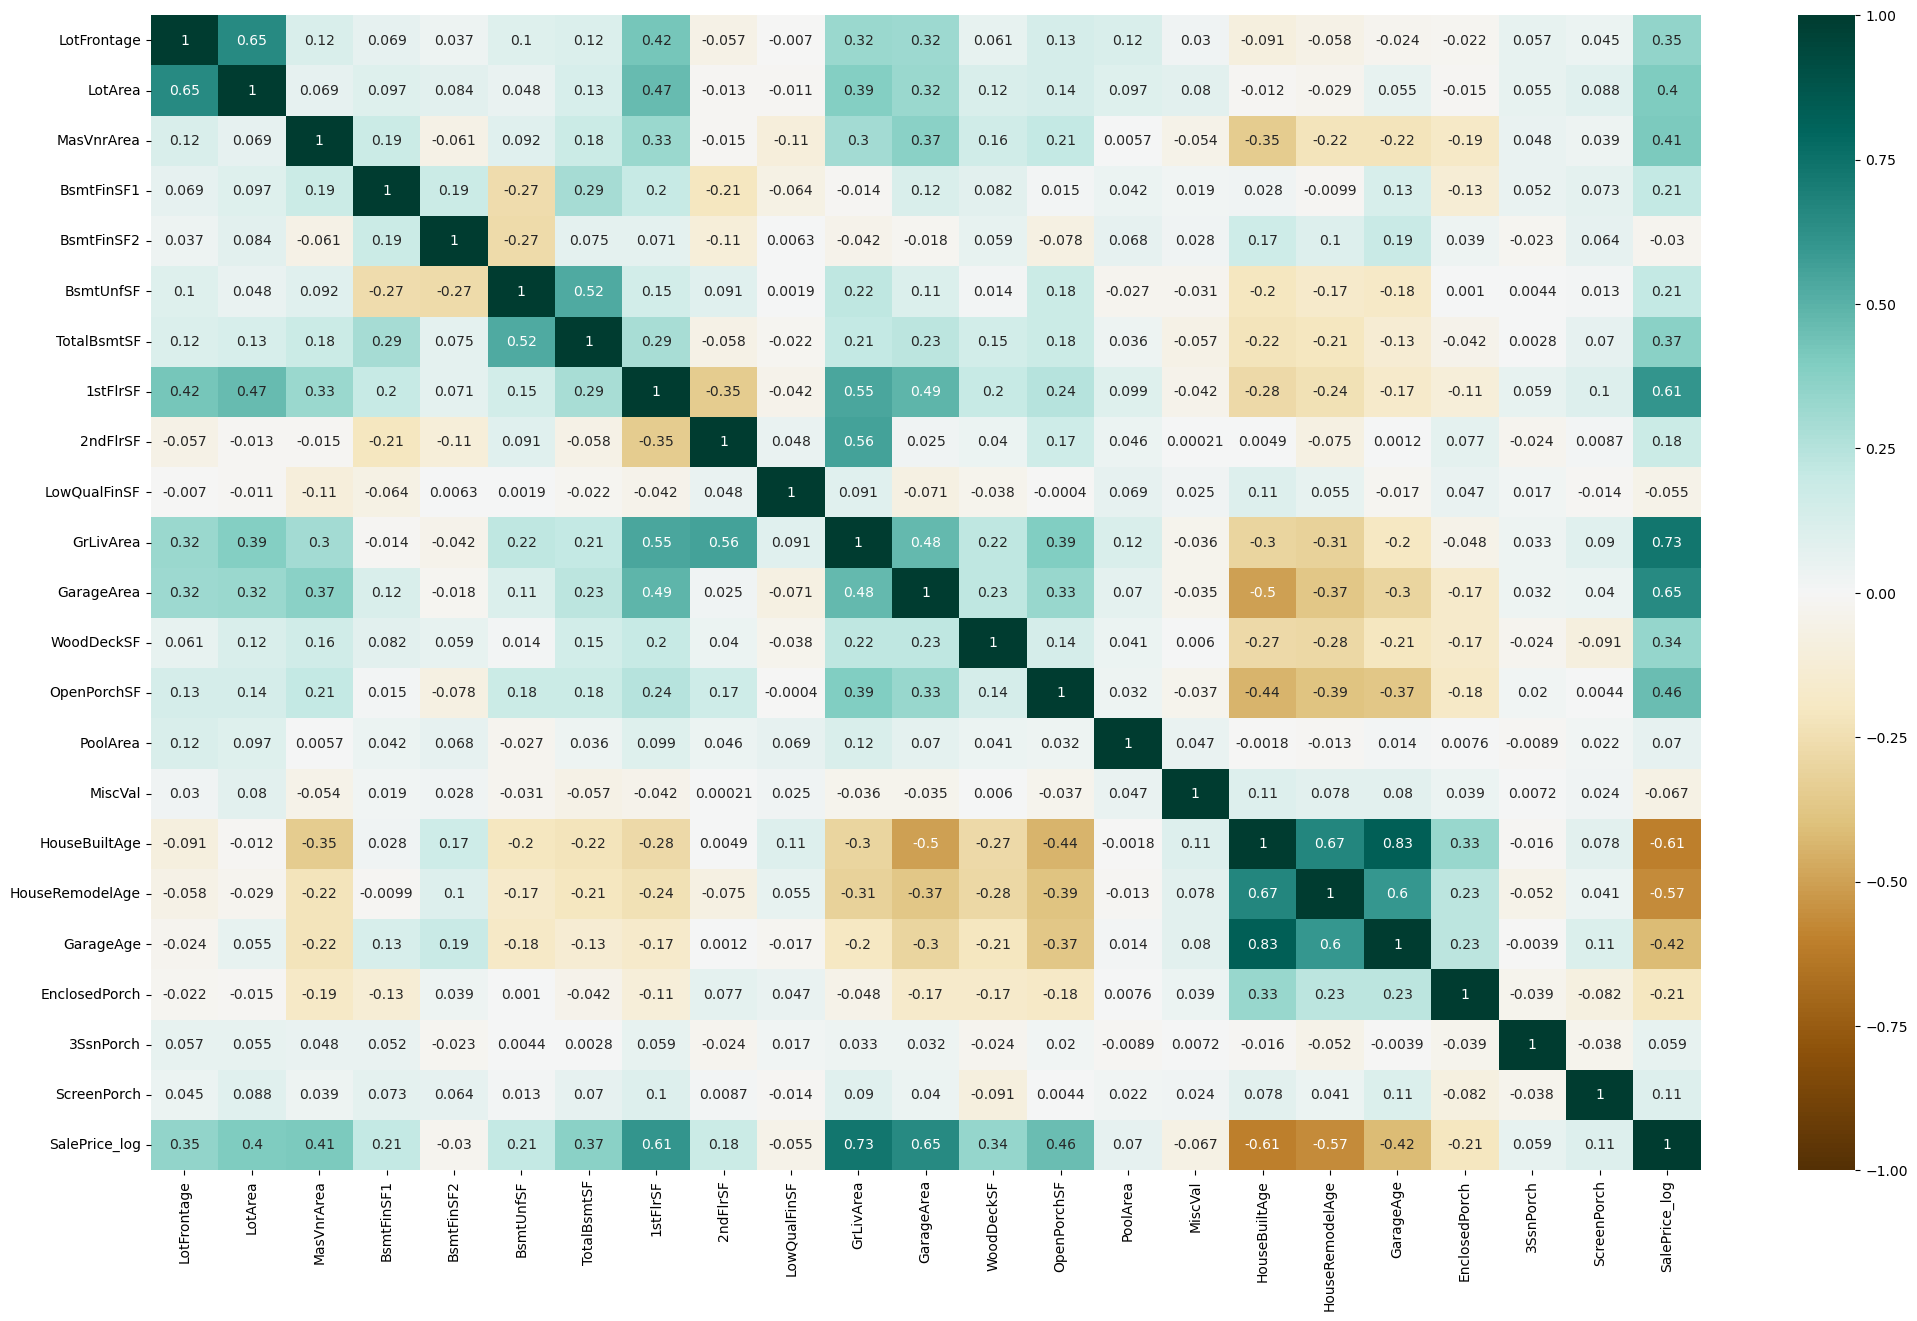

In [40]:
plt.figure(figsize=(25, 15))

sns.heatmap(numData.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')

### Observation:
- SalePrice_log is higly correlated with GrLivArea, GarageArea, 1stFlrSF, OpenPorchSF, MasVnrArea and LotArea (> 0.4)
- SalePrice_log is negatively correlated with HouseBuiltAge, HouseRemodelAge, garageAge

These findings are similar to earlier inference from actual dataFrame

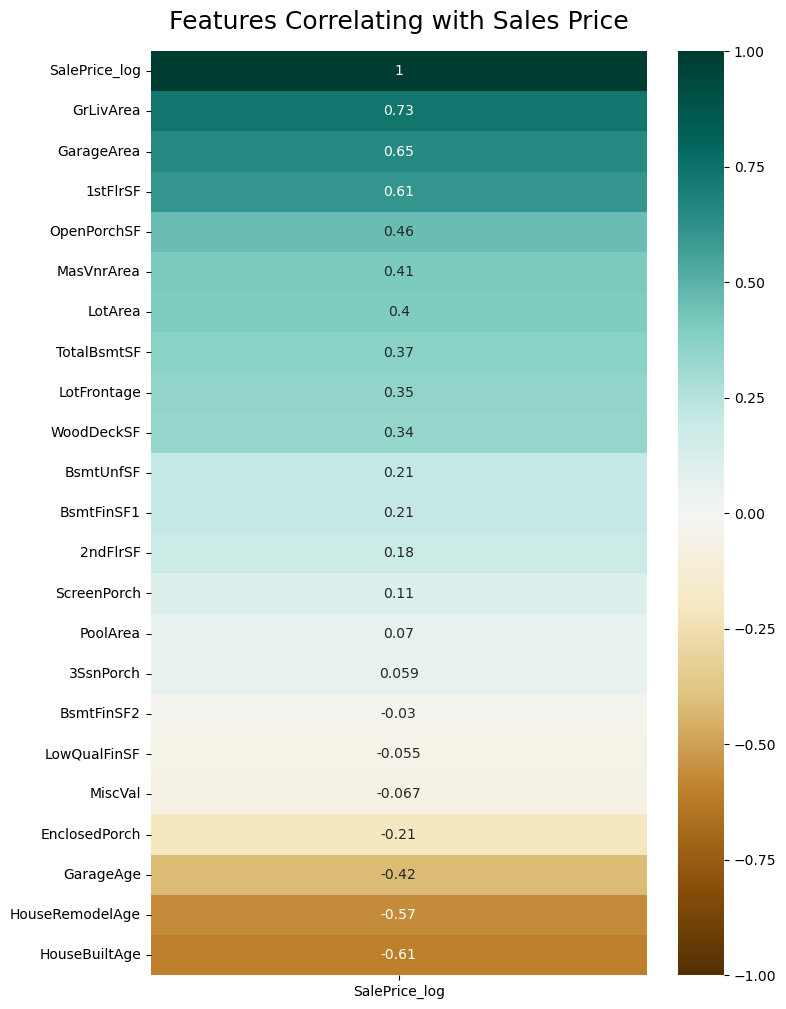

In [41]:
##Creating correlation matrix in single column to get more clear view
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(numData.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

### selecting the numerical columns that have correlation value of more than 0.2 with the target variable

In [42]:
##Creating a temporary dataframe for the columns where correlation value is greater than 0.2
numDataCorr = numData.corr()
topNumDataCorr = numDataCorr.index[abs(numDataCorr['SalePrice_log']) > 0.2]
topNumDataCorr

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'HouseBuiltAge', 'HouseRemodelAge', 'GarageAge',
       'EnclosedPorch', 'SalePrice_log'],
      dtype='object')

In [43]:
## Checking shape of numeric dataframe
numDF_New = numData[topNumDataCorr]
numDF_New.shape

(1460, 16)

In [44]:
## Check 1st 5 rows of the dataframe
numDF_New.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0     4.189655  9.042040    5.283204    6.561031   5.017280     6.753438   
1     4.394449  9.169623    0.000000    6.886532   5.652489     7.141245   
2     4.234107  9.328212    5.093750    6.188264   6.075346     6.825460   
3     4.110874  9.164401    0.000000    5.379897   6.293419     6.629363   
4     4.442651  9.565284    5.860786    6.486161   6.196444     7.044033   

   1stFlrSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  HouseBuiltAge  \
0  6.753438   7.444833         548    0.000000     4.127134       1.791759   
1  7.141245   7.141245         460    5.700444     0.000000       3.465736   
2  6.825460   7.488294         608    0.000000     3.761200       2.079442   
3  6.869014   7.448916         642    0.000000     3.583519       4.521789   
4  7.044033   7.695758         836    5.262690     4.442651       2.197225   

   HouseRemodelAge  GarageAge  EnclosedPorch  SalePrice_log  
0                5   1.791759       0.000000      12.247694  
1               31   3.465736       0.000000      12.109011  
2                6   2.079442       0.000000      12.317167  
3               36   2.197225       5.609472      11.849398  
4                8   2.197225       0.000000      12.429216

### Categorical Data Preparation

In [45]:
## Creating temporary dataframe to prepare categorical data
catCols_New = df.select_dtypes(include=object).columns.tolist()
catCols_New

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [46]:
## Creating temporary dataframe to prepare categorical data
catData_New = df[catCols_New]
catData_New.shape

(1460, 51)

In [47]:
## Checking all the feature infor of the dataframe
catData_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   object
 14  OverallCond    1460 non-null   object
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

In [48]:
##Print 1st 5 rows of the dataframe
catData_New.head()

MSSubClass MSZoning Street LotShape LandContour  \
0             2-STORY 1946 & NEWER       RL   Pave      Reg         Lvl   
1  1-STORY 1946 & NEWER ALL STYLES       RL   Pave      Reg         Lvl   
2             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   
3             2-STORY 1945 & OLDER       RL   Pave      IR1         Lvl   
4             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1  ... GarageType  \
0    AllPub    Inside       Gtl      CollgCr       Norm  ...     Attchd   
1    AllPub       FR2       Gtl      Veenker      Feedr  ...     Attchd   
2    AllPub    Inside       Gtl      CollgCr       Norm  ...     Attchd   
3    AllPub    Corner       Gtl      Crawfor       Norm  ...     Detchd   
4    AllPub       FR2       Gtl      NoRidge       Norm  ...     Attchd   

  GarageFinish GarageCars GarageQual GarageCond PavedDrive MoSold YrSold  \
0          RFn          2         TA         TA          Y    Feb   2008   
1          RFn          2         TA         TA          Y    May   2007   
2          RFn          2         TA         TA          Y    Sep   2008   
3          Unf          3         TA         TA          Y    Feb   2006   
4          RFn          3         TA         TA          Y    Dec   2008   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal  

[5 rows x 51 columns]

In [49]:
# Adding Target variable to categorical DataFrame
catData_New = pd.concat([catData_New,numDF_New[['SalePrice_log']]],axis=1)
catData_New.head()

MSSubClass MSZoning Street LotShape LandContour  \
0             2-STORY 1946 & NEWER       RL   Pave      Reg         Lvl   
1  1-STORY 1946 & NEWER ALL STYLES       RL   Pave      Reg         Lvl   
2             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   
3             2-STORY 1945 & OLDER       RL   Pave      IR1         Lvl   
4             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1  ... GarageFinish  \
0    AllPub    Inside       Gtl      CollgCr       Norm  ...          RFn   
1    AllPub       FR2       Gtl      Veenker      Feedr  ...          RFn   
2    AllPub    Inside       Gtl      CollgCr       Norm  ...          RFn   
3    AllPub    Corner       Gtl      Crawfor       Norm  ...          Unf   
4    AllPub       FR2       Gtl      NoRidge       Norm  ...          RFn   

  GarageCars GarageQual GarageCond PavedDrive MoSold YrSold SaleType  \
0          2         TA         TA          Y    Feb   2008       WD   
1          2         TA         TA          Y    May   2007       WD   
2          2         TA         TA          Y    Sep   2008       WD   
3          3         TA         TA          Y    Feb   2006       WD   
4          3         TA         TA          Y    Dec   2008       WD   

  SaleCondition SalePrice_log  
0        Normal     12.247694  
1        Normal     12.109011  
2        Normal     12.317167  
3       Abnorml     11.849398  
4        Normal     12.429216  

[5 rows x 52 columns]

In [50]:
##Checking shape of the dataframe after concatenation
catData_New.shape

(1460, 52)

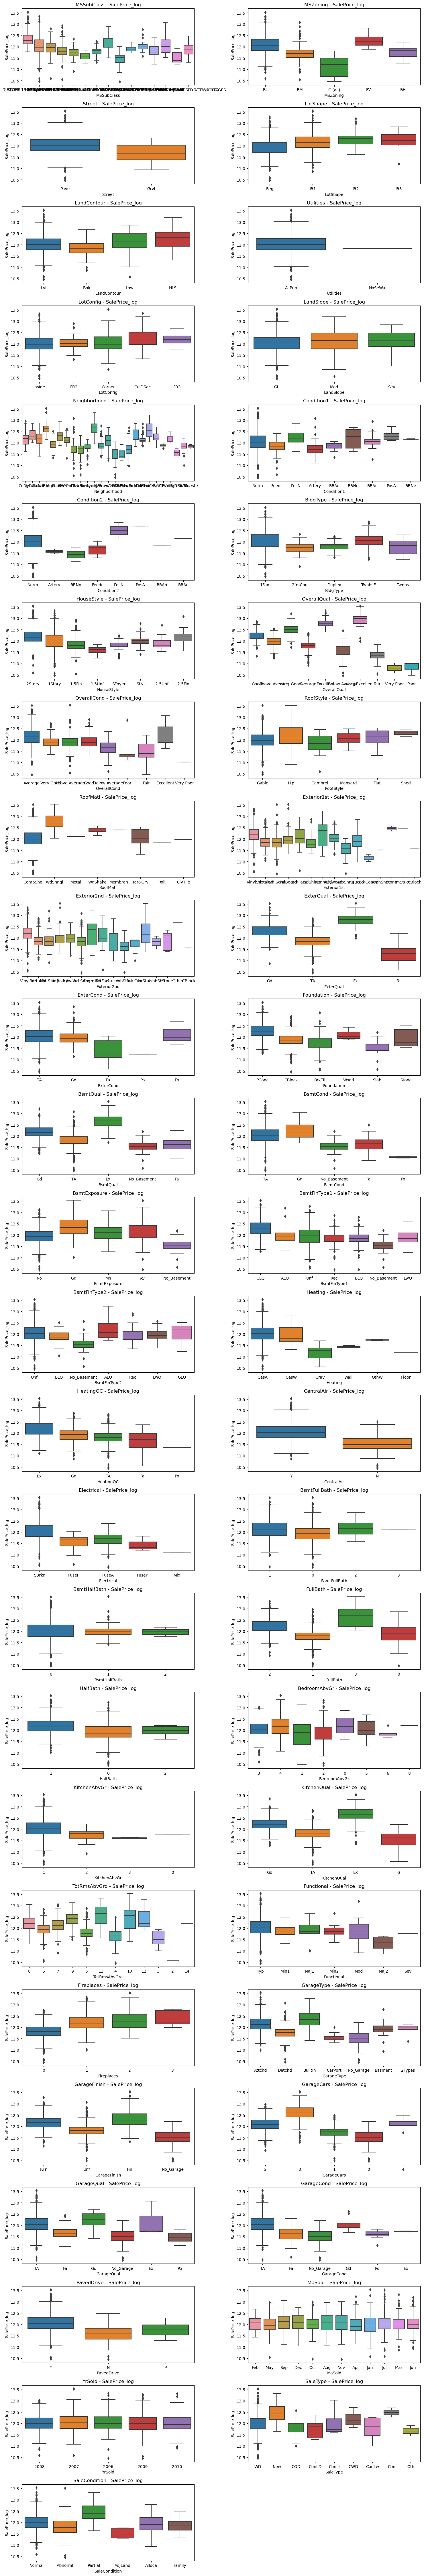

In [51]:
##Create box plot of features with respect to target variable
a = 29
b = 2
c = 1


fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in catCols_New:
    plt.subplot(a, b, c)
    plt.title('{} - SalePrice_log'.format(i))
    plt.xlabel(i)
    sns.boxplot(x=catData_New[i], y=catData_New['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### One hot Encoding - Encoding Categorical Features

In [52]:
#Add dummy features for categorical variable 
catData_New = pd.get_dummies(catData_New, dtype=int, drop_first = True)
catData_New.shape

(1460, 287)

In [53]:
##Check 1st 5 rows of the dataframe after dummy inclusion
catData_New.head()

SalePrice_log  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
0      12.247694                                         0   
1      12.109011                                         0   
2      12.317167                                         0   
3      11.849398                                         0   
4      12.429216                                         0   

   MSSubClass_1-STORY 1945 & OLDER  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  ...  SaleType_ConLI  SaleType_ConLw  \
0                                1  ...               0               0   
1                                0  ...               0               0   
2                                1  ...               0               0   
3                                0  ...               0               0   
4                                1  ...               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 287 columns]

### Merge categorical and numerical dataframe to get Final dataframe

In [54]:
## Drop 'SalePrice_log' to remove duplicate
catData_New = catData_New.drop('SalePrice_log', axis = 1)
catData_New.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 286 columns

In [55]:
## Merge categorical and numerical dataframe with main to get Final dataframe
df =  pd.concat([df[['Id']],catData_New,numDF_New],axis=1)
df.shape

(1460, 303)

In [56]:
## Dropping 'Id' as it is just for indexing purpose and won't impact any outcome
df = df.drop('Id', axis = 1)
df.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   ...  1stFlrSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
0  ...  6.753438   7.444833         548    0.000000     4.127134   
1  ...  7.141245   7.141245         460    5.700444     0.000000   
2  ...  6.825460   7.488294         608    0.000000     3.761200   
3  ...  6.869014   7.448916         642    0.000000     3.583519   
4  ...  7.044033   7.695758         836    5.262690     4.442651   

   HouseBuiltAge  HouseRemodelAge  GarageAge  EnclosedPorch  SalePrice_log  
0       1.791759                5   1.791759       0.000000      12.247694  
1       3.465736               31   3.465736       0.000000      12.109011  
2       2.079442                6   2.079442       0.000000      12.317167  
3       4.521789               36   2.197225       5.609472      11.849398  
4       2.197225                8   2.197225       0.000000      12.429216  

[5 rows x 302 columns]

# Train-Test Split

In [57]:
##Spliting the dataframe in train and test set in (70,30)

from sklearn.model_selection import train_test_split, GridSearchCV

train, test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 25)

In [58]:
##Reoving target variable from both train and test set
y_train = train['SalePrice_log']
X_train = train.drop("SalePrice_log", axis = 1)

y_test= test['SalePrice_log']
X_test = test.drop('SalePrice_log', axis = 1)

In [59]:
##Print shape for all the train and test dataframe
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (1021, 301)
X test shape (438, 301)
y train shape (1021,)
y test shape (438,)


In [60]:
##Print 1st 5 rows of 'y_train'
print(y_train.head())

122     11.820410
492     12.059803
1205    12.513190
116     11.842229
1017    12.141534
Name: SalePrice_log, dtype: float64


In [61]:
##Print 1st 5 rows of 'y_test'
print(y_test.head())

932     12.676076
409     12.735965
1271    12.132157
270     12.491252
1290    12.103486
Name: SalePrice_log, dtype: float64


### Linear Regression - Model Building

In [62]:
## Building a Linear Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [63]:
## Running RFE with the output number of the variable equal to 60
from sklearn.feature_selection import RFE
rfe = RFE(reg, n_features_to_select=60)
rfe = rfe.fit(X_train, y_train)

In [64]:
#Print Columns selected by RFE.
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['MSSubClass_1-STORY 1945 & OLDER',
       'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-STORY 1945 & OLDER', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSSubClass_SPLIT FOYER', 'MSSubClass_SPLIT OR MULTI-LEVEL',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'OverallQual_Excellent', 'OverallQual_Very Excellent',
       'OverallQual_Very Poor', 'OverallCond_Fair', 'OverallCond_Very Poor',
       

In [65]:
### Creating X_train dataframe with RFE selected variables
X_train_new=X_train[rfe_col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:06:43   Log-Likelihood:                 429.27
No. Observations:                1021   AIC:                            -764.5
Df Residuals:                     974   BIC:                            -532.9
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                3.5704      0.248     14.386      0.000       3.083       4.057
MSSubClass_1-STORY 1945 & OLDER                                      0.0726      0.031      2.305      0.021       0.011       0.134
MSSubClass_1-STORY 1946 & NEWER ALL STYLES                           0.2078      0.021      9.907      0.000       0.167       0.249
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER     0.3637      0.029     12.521      0.000       0.307       0.421
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES                         0.1243      0.116      1.068      0.286      -0.104       0.353
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                 0.0078      0.020      0.399      0.690      -0.031       0.046
MSSubClass_2-STORY 1945 & OLDER                                      0.0661      0.031      2.135      0.033       0.005       0.127
MSSubClass_2-STORY 1946 & NEWER                                      0.1463      0.022      6.627      0.000       0.103       0.190
MSSubClass_2-STORY PUD - 1946 & NEWER                                0.0074      0.030      0.246      0.806      -0.052       0.066
MSSubClass_DUPLEX - ALL STYLES AND AGES                             -0.0298      0.017     -1.742      0.082      -0.063       0.004
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   0.2592      0.057      4.508      0.000       0.146       0.372
MSSubClass_SPLIT FOYER                                               0.2434      0.046      5.256      0.000       0.153       0.334
MSSubClass_SPLIT OR MULTI-LEVEL                                      0.1616      0.033      4.861      0.000       0.096       0.227
MSZoning_FV                                                          0.7216      0.079      9.093      0.000       0.566       0.877
MSZoning_RH                                                          0.4367      0.095      4.619      0.000       0.251       0.622
MSZoning_RL                                                          0.6103      0.075      8.149      0.000       0.463       0.757
MSZoning_RM                                                          0.4543      0.075      6.026      0.000       0.306       0.602
Condition2_Feedr                                                     0.3732      0.124      3.019      0.003       0.131       0.616
Condition2_Norm                                                      0.4722      0.090      5.257      0.000       0.296       0.649
Condition2_PosA                                                      0.7136      0.187      3.806      0.000       0.346       1.082
Condition2_RRAe         

### Observation:

R2 Score is 0.836 and Adj. R2_Score is 0.828.

### Ridge Regression - Model Building

In [66]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
## Print best alpha and its score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 6.0}
-0.08450262863521432


In [68]:
## Checking cross validation for all the sets
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.013185      0.001713         0.004892        0.001128      0.0001   
1        0.011121      0.001255         0.003957        0.001098       0.001   
2        0.011836      0.002218         0.004503        0.000446        0.01   
3        0.022616      0.006768         0.007964        0.003418        0.05   
4        0.015291      0.004602         0.005520        0.002186         0.1   
5        0.012351      0.002935         0.005404        0.002425         0.2   
6        0.013255      0.002122         0.004710        0.001003         0.3   
7        0.015324      0.004803         0.005929        0.001224         0.4   
8        0.012714      0.000396         0.004643        0.000708         0.5   
9        0.018326      0.005713         0.006838        0.002686         0.6   
10       0.012083      0.001637         0.004398        0.000806         0.7   
11       0.013599      0.003731         0.006036        0.002382         0.8   
12       0.011505      0.002096         0.004719        0.001560         0.9   
13       0.018894      0.008041         0.006737        0.003129         1.0   
14       0.013996      0.004415         0.005711        0.003240         2.0   
15       0.011555      0.001308         0.003794        0.000747         3.0   
16       0.012730      0.000378         0.004829        0.000420         4.0   
17       0.015434      0.002325         0.005511        0.001001         5.0   
18       0.019389      0.003750         0.006803        0.002307         6.0   
19       0.013110      0.001197         0.004585        0.000512         7.0   
20       0.012021      0.001669         0.004018        0.000917         8.0   
21       0.012924      0.004798         0.004313        0.001475         9.0   
22       0.013442      0.000567         0.004317        0.000755        10.0   
23       0.014821      0.004417         0.006779        0.002533          20   
24       0.011044      0.002049         0.004591        0.001855          50   
25       0.011515      0.002162         0.004178        0.000756         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.099995          -0.093406   
1    {'alpha': 0.001}          -0.098809          -0.093319   
2     {'alpha': 0.01}          -0.094289          -0.092660   
3     {'alpha': 0.05}          -0.092606          -0.090404   
4      {'alpha': 0.1}          -0.093016          -0.088377   
5      {'alpha': 0.2}          -0.093082          -0.086381   
6      {'alpha': 0.3}          -0.092866          -0.085241   
7      {'alpha': 0.4}          -0.092647          -0.084315   
8      {'alpha': 0.5}          -0.092571          -0.083496   
9      {'alpha': 0.6}          -0.092468          -0.082833   
10     {'alpha': 0.7}          -0.092472          -0.082375   
11     {'alpha': 0.8}          -0.092530          -0.081981   
12     {'alpha': 0.9}          -0.092557          -0.081653   
13     {'alpha': 1.0}          -0.092565          -0.081438   
14     {'alpha': 2.0}          -0.092429          -0.080254   
15     {'alpha': 3.0}          -0.092215          -0.079748   
16     {'alpha': 4.0}          -0.092152          -0.079796   
17     {'alpha': 5.0}          -0.092068          -0.079878   
18     {'alpha': 6.0}          -0.091970          -0.080041   
19     {'alpha': 7.0}          -0.091932          -0.080388   
20     {'alpha': 8.0}          -0.091918          -0.080826   
21     {'alpha': 9.0}          -0.091924          -0.081280   
22    {'alpha': 10.0}          -0.091938          -0.081766   
23      {'alpha': 20}          -0.093273          -0.086643   
24      {'alpha': 50}          -0.097737          -0.096649   
25     {'alpha': 100}          -0.103106          -0.106984   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0           -0.106973          -0.095201  ...        -0.098008   
1        

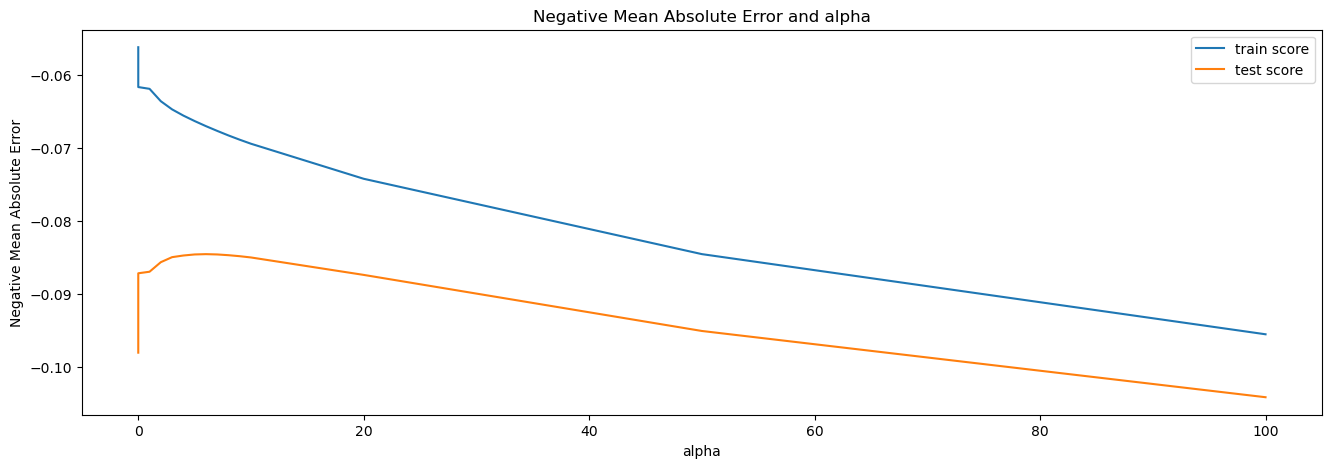

In [69]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [70]:
#final ridge model on best alpha
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.59830400e-02, -4.84845675e-02,  4.31076579e-02,  2.43542056e-02,
        1.13256576e-02, -4.50177477e-03,  3.50885905e-02,  1.72496119e-02,
       -1.03065616e-02, -4.64298731e-02,  1.05844957e-02, -4.20587247e-03,
        2.45716122e-02, -3.67638635e-03,  8.06768648e-02,  2.39018237e-02,
        6.58171540e-02,  2.78184285e-02,  6.42649899e-02,  5.08252658e-02,
       -3.98948863e-02, -2.44841142e-04,  6.41422921e-02,  1.67668639e-02,
        4.83968341e-02,  0.00000000e+00,  2.24908328e-02, -4.06327422e-02,
       -2.99428572e-02, -7.54082406e-03,  1.91428452e-02, -2.20656144e-02,
       -1.34325118e-03, -3.90865909e-03,  4.10791837e-02,  2.74297404e-02,
       -1.51298824e-02,  8.62382684e-02, -7.98120060e-02, -3.13902008e-02,
       -7.50935940e-02, -7.36874700e-02, -2.86758458e-02, -3.24896784e-02,
        1.65591699e-02, -3.35247466e-02,  5.37021139e-02,  7.11874544e-02,
       -4.90297427e-02, -2.66405139e-02, -1.66605820e-02, -3.80552591e-03,
        3.15097190e-02,  

### Prediction

In [71]:
##Getting different performance evaluation metric

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric1 = []

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)
metric1.append(train1_r2)
test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)
metric1.append(test1_r2)

rss1_train = np.sum(np.square(y_train - y_train_pred))
print('RSS_Score_Train: ', rss1_train)
metric1.append(rss1_train)
rss1_test = np.sum(np.square(y_test - y_test_pred))
print('RSS_Score_Test: ', rss1_test)
metric1.append(rss1_test)

rmse1_train = mean_squared_error(y_train, y_train_pred)
print("MSE_Train : ", rmse1_train)
metric1.append(rmse1_train)
rmse1_test = mean_squared_error(y_test, y_test_pred)
print("MSE_Test : ", rmse1_test)
metric1.append(rmse1_test)

mae1_train = mean_absolute_error(y_train, y_train_pred)
print("MAE_Train : ",mae1_train)
metric1.append(mae1_train)
mae1_test = mean_absolute_error(y_test, y_test_pred)
print("MAE_Test : ",mae1_test)
metric1.append(mae1_test)

R2_Score_Train:  0.9343036086840408
R2_Score_Test:  0.8922923689932759
RSS_Score_Train:  10.314521257862545
RSS_Score_Test:  8.155925506310837
MSE_Train :  0.010102371457260083
MSE_Test :  0.018620834489294146
MAE_Train :  0.06751962066681191
MAE_Test :  0.09372601785540224


Text(0.5, 0, 'Errors')

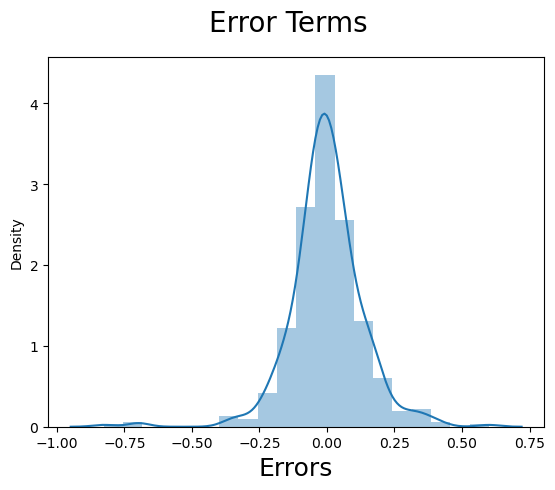

In [72]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

### Most of the values are populated at the centre (zero error) , error distribution looks fine.

Text(0.5, 0, 'Errors')

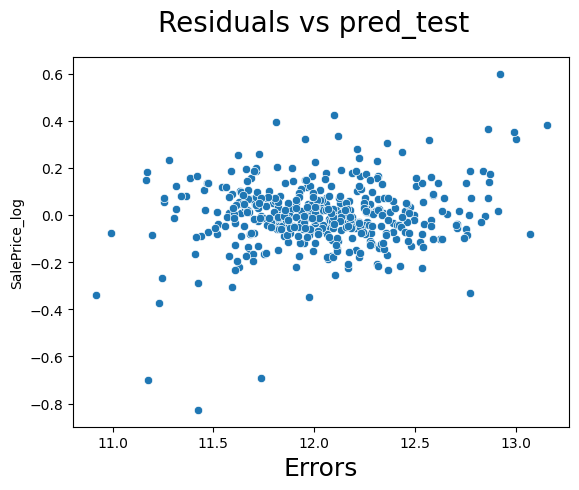

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(x=y_test_pred,y=(y_test - y_test_pred))
fig.suptitle('Residuals vs pred_test', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

#### The residuals are scattered around '0'

In [74]:
main_coef1=pd.Series(ridge.coef_,index=X_train.columns)
var_selected1= sum(ridge.coef_!=0)
print("The number of feautures selected by Ridge :",var_selected1)

The number of feautures selected by Ridge : 292


### Lasso Regression - Model Building

In [75]:
## # list of alphas to tune for lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [77]:
## Printing the best alpha and its score
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08752821712863876


In [78]:
#final lasso model
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [79]:
##Getting different performance evaluation metric

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

metric2 = []

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)
metric2.append(train1_r2)
test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)
metric2.append(test1_r2)

rss1_train = np.sum(np.square(y_train - y_train_pred))
print('RSS_Train: ', rss1_train)
metric2.append(rss1_train)
rss1_test = np.sum(np.square(y_test - y_test_pred))
print('RSS_Test: ', rss1_test)
metric2.append(rss1_test)

rmse1_train = mean_squared_error(y_train, y_train_pred)
print("MSE_Train : ", rmse1_train)
metric2.append(rmse1_train)
rmse1_test = mean_squared_error(y_test, y_test_pred)
print("MSE_Test : ", rmse1_test)
metric2.append(rmse1_test)

mae1_train = mean_absolute_error(y_train, y_train_pred)
print("MAE_Train : ",mae1_train)
metric2.append(mae1_train)
mae1_test = mean_absolute_error(y_test, y_test_pred)
print("MAE_Test : ",mae1_test)
metric2.append(mae1_test)

R2_Score_Train:  0.944549289668914
R2_Score_Test:  0.8959197826848133
RSS_Train:  8.705920051572537
RSS_Test:  7.881247513932521
MSE_Train :  0.008526856074018156
MSE_Test :  0.017993715785234066
MAE_Train :  0.06377549989922056
MAE_Test :  0.09360212797972473


In [80]:
##Print coefficient values for Lasso
lasso.coef_

array([-3.52009495e-02, -1.65297475e-02,  5.40702146e-02,  1.88010217e-02,
        0.00000000e+00, -1.31603801e-02, -3.54299273e-03,  0.00000000e+00,
       -1.02632985e-02, -7.68472013e-02,  0.00000000e+00,  0.00000000e+00,
        2.86597540e-02,  0.00000000e+00,  3.24758639e-01,  2.24329542e-01,
        2.75984906e-01,  2.47559953e-01,  5.80743937e-02,  4.76826738e-02,
       -3.33490302e-02,  2.11002477e-03,  5.97945218e-02,  1.16634488e-02,
        4.57652603e-02,  0.00000000e+00,  2.43667049e-02, -4.39197492e-02,
       -1.31584792e-01, -9.28405792e-03,  1.94324053e-02, -2.51775504e-02,
       -0.00000000e+00, -0.00000000e+00,  2.87177031e-02,  2.71192424e-02,
       -6.50934622e-03,  9.88552661e-02, -8.55066081e-02, -1.65364462e-02,
       -7.17509831e-02, -1.25472060e-01, -2.81113095e-02, -3.57314718e-02,
        1.31779264e-02, -3.30251909e-02,  7.60122009e-02,  9.57491335e-02,
       -7.73764376e-02, -2.37204667e-02, -1.38114785e-02,  1.03928275e-02,
        1.75445511e-02,  

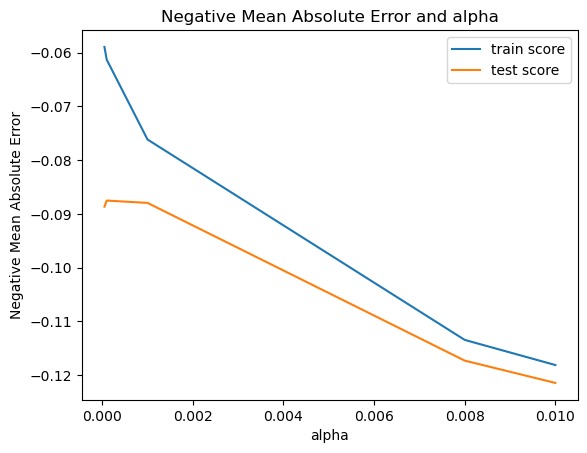

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Text(0.5, 0, 'Errors')

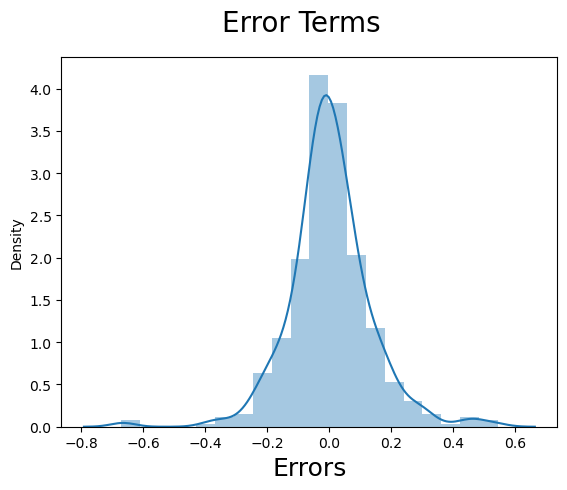

In [82]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

### Most of the values are populated at the centre (zero error) , looks fine.

Text(0.5, 0, 'Errors')

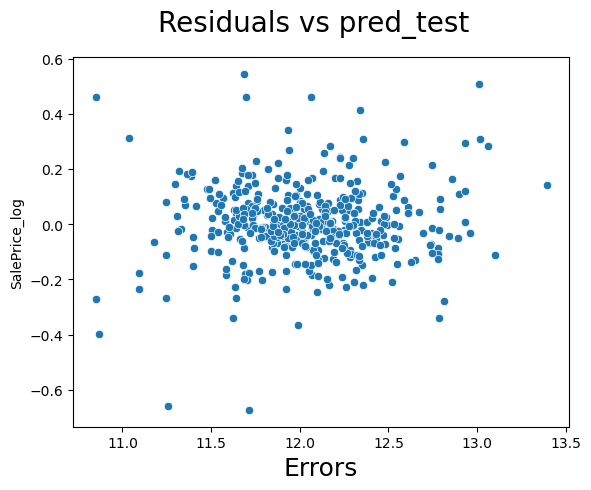

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(x=y_test_pred,y=(y_test - y_test_pred))
fig.suptitle('Residuals vs pred_test', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

The residuals are scattered around '0'

In [84]:
main_coef=pd.Series(lasso.coef_,index=X_train.columns)
var_selected= sum(lasso.coef_!=0)
print("The number of feautures selected by lasso :",var_selected)

The number of feautures selected by lasso : 218


In [85]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'MAE (Train)','MAE (Test)'], 
        
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.934304          0.944549
1   R2 Score (Test)          0.892292          0.895920
2       RSS (Train)         10.314521          8.705920
3        RSS (Test)          8.155926          7.881248
4       MSE (Train)          0.010102          0.008527
5        MSE (Test)          0.018621          0.017994
6       MAE (Train)          0.067520          0.063775
7        MAE (Test)          0.093726          0.093602

#### Best parameter for Ridge is 6.0.
#### Best parameter for Lasso is 0.0001.

In [86]:
##Prepare metric to compare Ridge and Lasso score
betas = pd.DataFrame(index=X_train.columns)
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False).head(15)

Ridge     Lasso
GrLivArea              0.230430  0.391125
MSZoning_FV            0.080677  0.324759
RoofMatl_WdShngl       0.083590  0.297160
MSZoning_RL            0.065817  0.275985
MSZoning_RM            0.027818  0.247560
MSZoning_RH            0.023902  0.224330
BsmtFullBath_3         0.036013  0.189576
Condition2_PosA        0.039955  0.164583
OverallQual_Excellent  0.132869  0.163479
Neighborhood_StoneBr   0.117412  0.149406
BsmtQual_No_Basement   0.024856  0.148034
FullBath_3             0.095356  0.115948
SaleCondition_AdjLand  0.033982  0.113030
OverallQual_Very Good  0.097074  0.100043
Neighborhood_Crawfor   0.086238  0.098855

In [87]:
##Prepare metric to compare Ridge score
betas4 = pd.DataFrame(index=X_train.columns)
betas4['Ridge'] = ridge.coef_

betas4.sort_values(by=['Ridge'], ascending=False).head(5)

Ridge
GrLivArea              0.230430
OverallQual_Excellent  0.132869
Neighborhood_StoneBr   0.117412
OverallQual_Very Good  0.097074
FullBath_3             0.095356

### Question 1: Double the values of Alpha for Ridge and Lasso
- Best parameter for Ridge is 6.0.
- Best parameter for Lasso is 0.0001.

### After doubling the values
- Best parameter for Ridge is 12.0.
- Best parameter for Lasso is 0.0002.

In [88]:
##Ridge
#earlier for Ridge alpha = 6 now take 12
alpha = 12
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print('ridge.coef: ', ridge.coef_)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)

test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)

ridge.coef:  [-1.70542512e-02 -5.49571877e-02  3.68674676e-02  2.28307918e-02
  6.19090633e-03 -5.78489013e-03  3.36233727e-02  2.43531174e-02
 -9.44735059e-03 -3.61310956e-02  8.24579296e-03 -6.80499489e-03
  1.54445097e-02 -4.35461786e-03  5.44965482e-02  8.40771952e-03
  4.93682964e-02  4.29427865e-03  4.67100939e-02  4.48892154e-02
 -3.14192990e-02 -1.49233669e-03  5.22333507e-02  8.52895371e-03
  3.94657713e-02  0.00000000e+00  2.47866238e-02 -3.30990882e-02
 -1.49292327e-02 -5.53859799e-03  1.63322400e-02 -1.70815323e-02
  7.25864646e-04 -1.70344878e-04  4.11198503e-02  2.31132216e-02
 -1.74153010e-02  7.92090551e-02 -7.23900224e-02 -3.08176499e-02
 -5.99633938e-02 -5.33010946e-02 -2.61173883e-02 -2.68666090e-02
  7.87918392e-03 -2.59173667e-02  4.22523331e-02  6.13676871e-02
 -3.62206575e-02 -1.89524712e-02 -1.44091364e-02 -7.66174718e-03
  2.77448695e-02  9.39840489e-02 -7.57397077e-03  2.38573214e-02
 -1.64648495e-02  4.07506387e-02  1.22357701e-02 -1.03106825e-04
 -4.53975289

In [89]:
##Prepare metric for Ridge coefficient
betas1 = pd.DataFrame(index=X_train.columns)
betas1['Ridge'] = ridge.coef_
betas1.sort_values(by=['Ridge'], ascending=False).head(5)

Ridge
GrLivArea              0.194211
OverallQual_Excellent  0.113637
1stFlrSF               0.099668
Neighborhood_StoneBr   0.093984
OverallQual_Very Good  0.088172

### R2 score dropped from 
### 0.934303 to 0.92783 for train data
### 0.892292 to 0.88942 for test data.

In [90]:
##Lasso
#earlier for Lass alpha = 0.0001 now take 0.0002.
alpha = 0.0002
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
print('lasso.coef: ', lasso.coef_)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)

test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)

lasso.coef:  [-4.68419993e-02 -3.91120583e-02  3.79800615e-02  3.74132636e-03
  0.00000000e+00 -1.20913767e-02 -0.00000000e+00  0.00000000e+00
 -1.30714441e-02 -7.52565558e-02  0.00000000e+00 -0.00000000e+00
  2.06432325e-02  3.16808328e-03  1.77251218e-01  7.66964281e-02
  1.38835656e-01  1.09715834e-01  5.55743341e-02  4.83140830e-02
 -1.94860794e-02  1.44347386e-03  5.33115172e-02  4.51890045e-03
  4.18291153e-02  0.00000000e+00  2.87071421e-02 -3.43746921e-02
 -4.44971552e-02 -4.96837015e-03  1.15585903e-02 -7.12412974e-03
 -0.00000000e+00 -0.00000000e+00  4.22017942e-02  3.23596934e-02
 -0.00000000e+00  1.07724170e-01 -6.93358124e-02 -8.48246773e-03
 -7.32358136e-02 -9.59157373e-02 -1.64954359e-02 -2.26214271e-02
  0.00000000e+00 -1.73659401e-02  7.74483940e-02  9.68636071e-02
 -6.20369210e-02 -9.33075772e-03 -8.90610940e-04  1.10393285e-02
  2.75282571e-02  1.51570232e-01  0.00000000e+00  2.12142305e-02
 -1.57257919e-02  3.77399519e-02  0.00000000e+00  3.17170104e-02
 -8.42930840

In [91]:
##Prepare metric for Lasso coefficient
betas2 = pd.DataFrame(index=X_train.columns)
betas2['Lasso'] = lasso.coef_
betas2.sort_values(by=['Lasso'], ascending=False).head(5)

Lasso
GrLivArea              0.369072
RoofMatl_WdShngl       0.214055
MSZoning_FV            0.177251
OverallQual_Excellent  0.159879
Neighborhood_StoneBr   0.151570

### With alpha of 0.0002 for Lasso, R2 score dropped from 
### 0.944549 to 0.939237 for train data
### 0.895919 to 0.893725 for test data

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?



In [92]:
#Top 5 features are of Lasso with alpha = 0.0001 are:

#GrLivArea
#MSZoning_FV
#RoofMatl_WdShngl
#MSZoning_RL
#MSZoning_RM

#Drop the top 5 features

X_train =  X_train.drop(['GrLivArea', 'MSZoning_FV', 'RoofMatl_WdShngl', 'MSZoning_RL', 'MSZoning_RM'], axis=1)
X_test =  X_test.drop(['GrLivArea', 'MSZoning_FV', 'RoofMatl_WdShngl', 'MSZoning_RL', 'MSZoning_RM'], axis=1)

In [93]:
# Rebuild lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.09136608190331647


In [95]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

##Getting R2 score after dropping top 5 columns

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)

test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)

R2_Score_Train:  0.9069628051863066
R2_Score_Test:  0.8796644563284597


### After rebuilding R2 score changed from 0.944549 to 0.906962 for train and 0.895919 to 0.879664 for test.

### Top 5 features after rebuilding

In [96]:
##Prepare metric for Lasso coefficient
betas3 = pd.DataFrame(index=X_train.columns)
betas3['Lasso'] = lasso.coef_
betas3.sort_values(by=['Lasso'], ascending=False).head(5)

Lasso
1stFlrSF               0.259284
OverallQual_Excellent  0.187333
OverallQual_Very Good  0.118594
Neighborhood_StoneBr   0.115292
Neighborhood_Crawfor   0.114022